In [59]:
# Installing the required packages
install.packages("cowplot")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
# Loading the required libraries
library(readr)
library(dplyr)
library(ggplot2)
library(cowplot)
library(boot)
library(car)
library(MASS)
library(broom)

In [61]:
# Loading the datasets (red wine and white wine)
red_wine <- read.csv("wine_red.csv")
white_wine <- read.csv("wine_white.csv")

In [62]:
# Combining the datasets and creating a new column for wine type
red_wine$Type <- "Red"
white_wine$Type <- "White"
nc_wine_data <- rbind(red_wine, white_wine)

In [63]:
# Checking for the names of variables in the combined dataset
names(nc_wine_data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Type"

In [64]:
#Checking for any missing value present in the 'wine_data' dataframe.
wine_data <- nc_wine_data %>%
  mutate_if(is.numeric, ~ifelse(is.na(.), mean(., na.rm = TRUE), .))

In [65]:
# Removing duplicate values from the 'wine_data' dataframe
wine_data <- distinct(wine_data)

In [66]:
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,Red


In [67]:
summary(wine_data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2400   1st Qu.: 1.800  
 Median : 7.000   Median :0.3000   Median :0.3100   Median : 2.700  
 Mean   : 7.215   Mean   :0.3441   Mean   :0.3185   Mean   : 5.048  
 3rd Qu.: 7.700   3rd Qu.:0.4100   3rd Qu.:0.4000   3rd Qu.: 7.500  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 16.00      1st Qu.: 74.0        1st Qu.:0.9922  
 Median :0.04700   Median : 28.00      Median :116.0        Median :0.9947  
 Mean   :0.05669   Mean   : 30.04      Mean   :114.1        Mean   :0.9945  
 3rd Qu.:0.06600   3rd Qu.: 41.00      3rd Qu.:153.2        3rd Qu.:0.9968  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [68]:
# Creating a vector to store the data types of all variables
data_types <- sapply(wine_data, class)

# Printing the data types in the specified format which is more readable and understandable
cat(paste(names(data_types), ": ", data_types, "\n", sep = "", collapse = ""))


fixed.acidity: numeric
volatile.acidity: numeric
citric.acid: numeric
residual.sugar: numeric
chlorides: numeric
free.sulfur.dioxide: numeric
total.sulfur.dioxide: numeric
density: numeric
pH: numeric
sulphates: numeric
alcohol: numeric
quality: integer
Type: character


In [69]:
str(wine_data)

'data.frame':	5320 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.9 7.3 7.8 7.5 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.66 0.6 0.65 0.58 0.5 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0.06 0 0.02 0.36 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.8 1.6 1.2 2 6.1 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.075 0.069 0.065 0.073 0.071 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 13 15 15 9 17 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 40 59 21 18 102 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.3 3.39 3.36 3.35 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.46 0.47 0.57 0.8 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 10 9.5 10.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 7 7 5 5 ...
 $ Type                : chr  "Red" "Red" "Red" "Red" ...


### Visualizing the dataframe

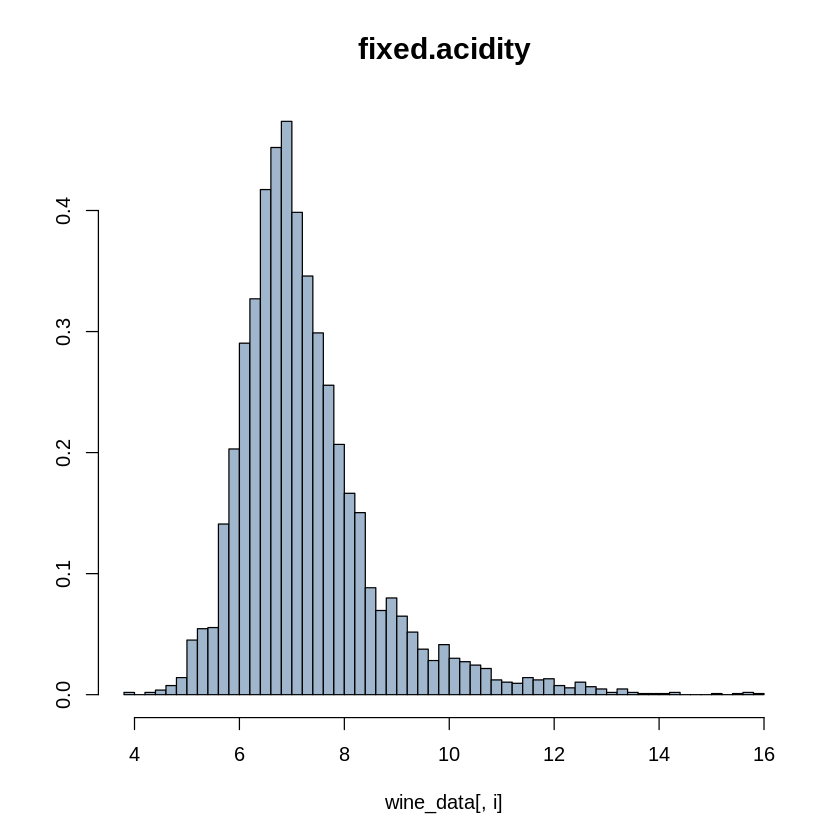

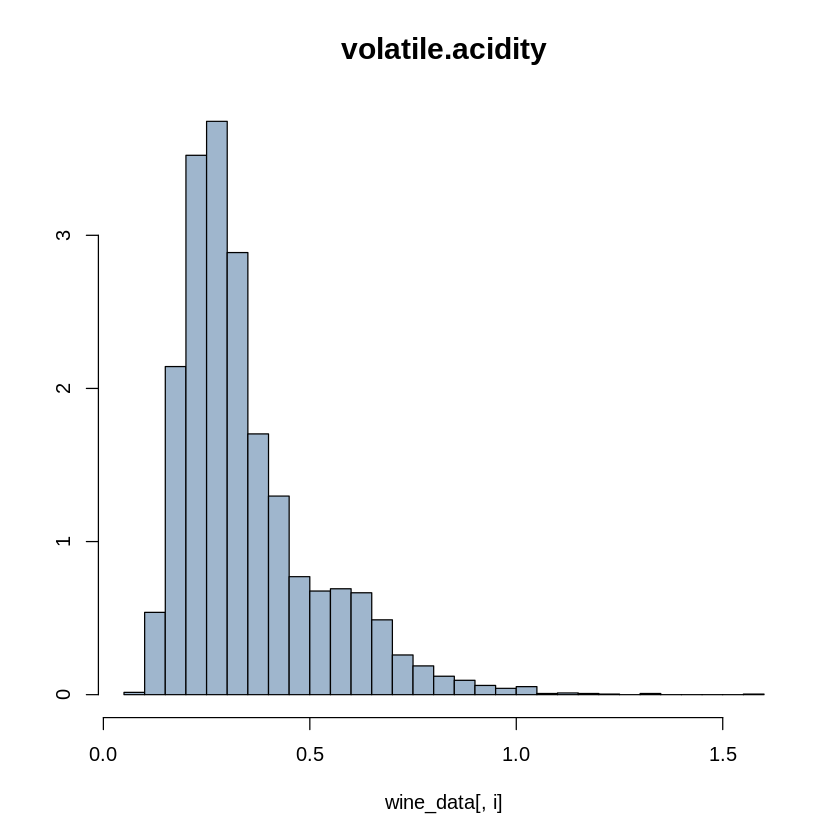

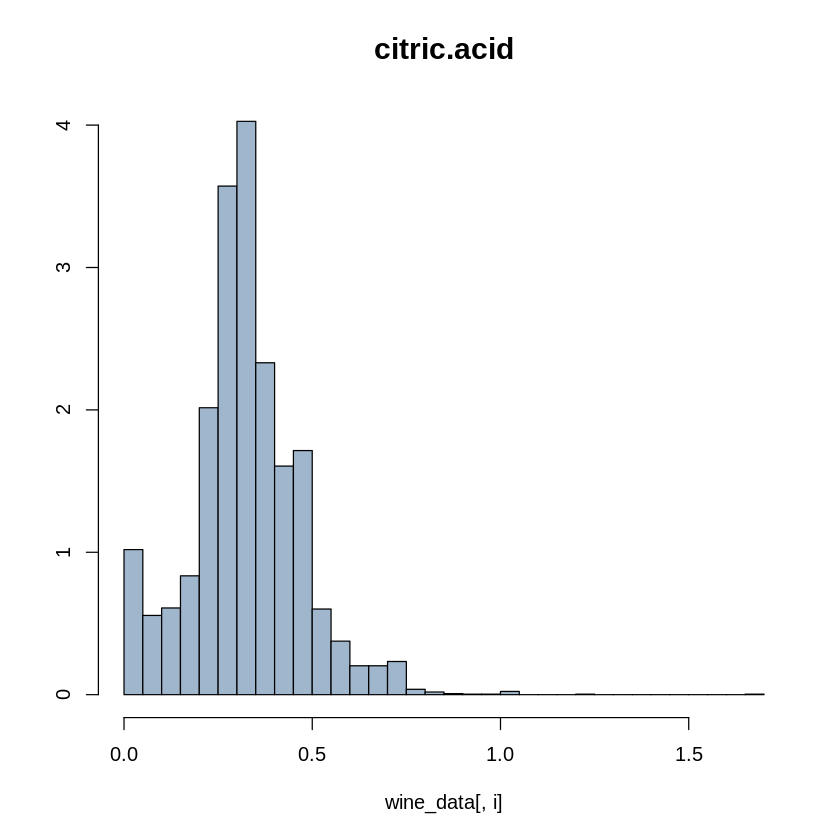

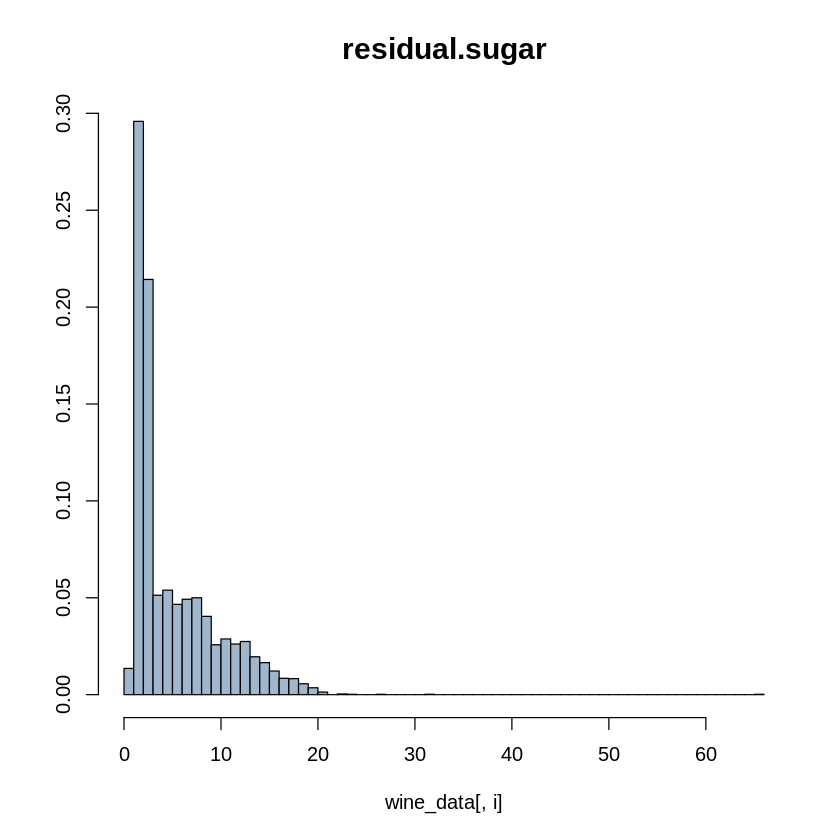

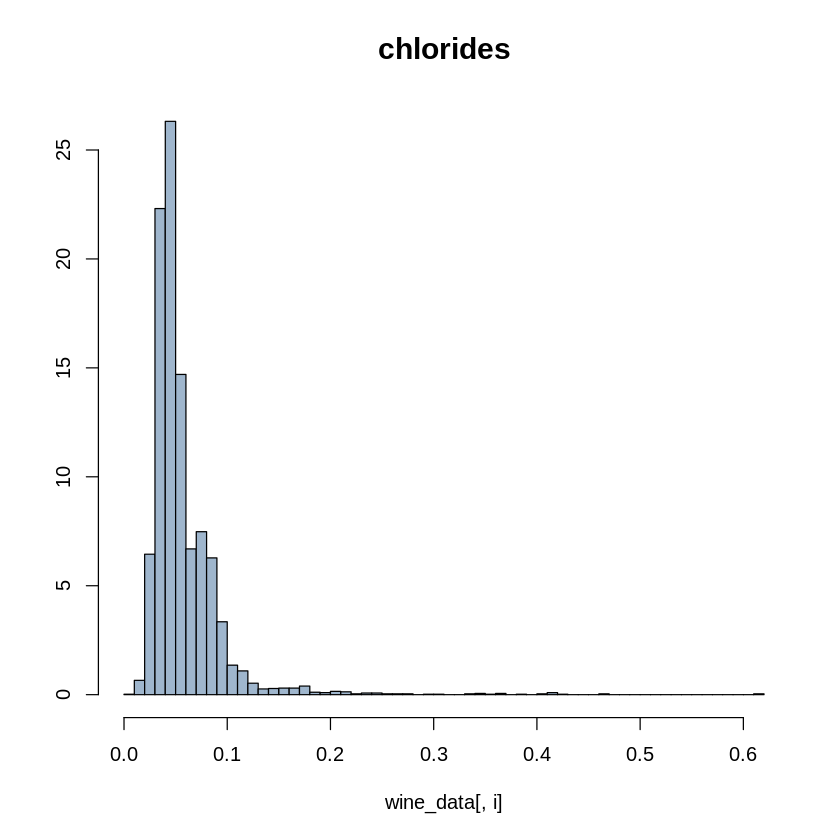

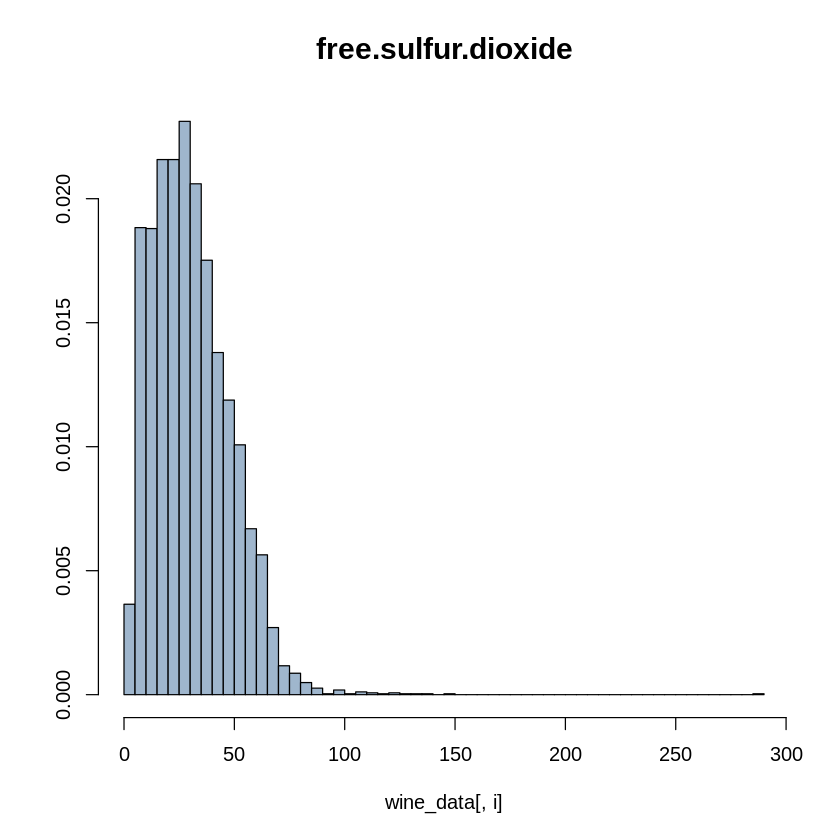

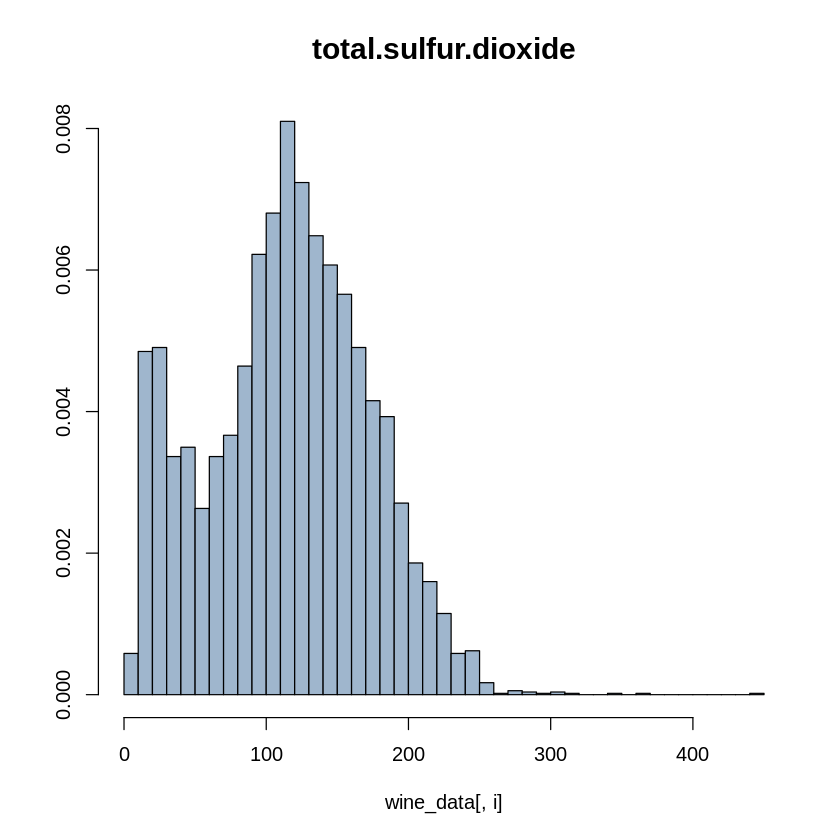

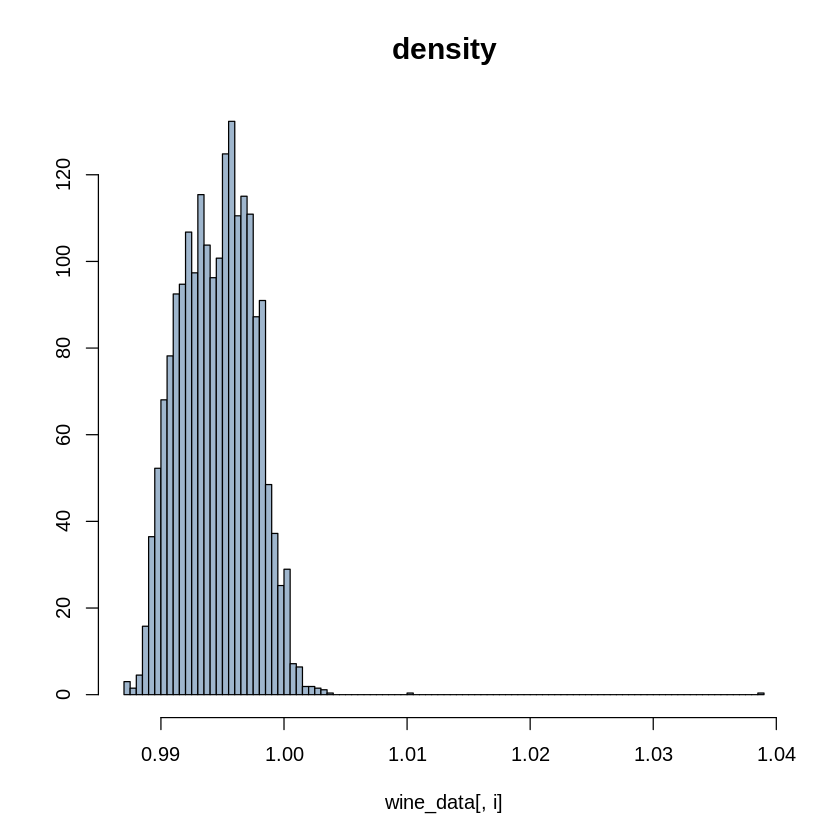

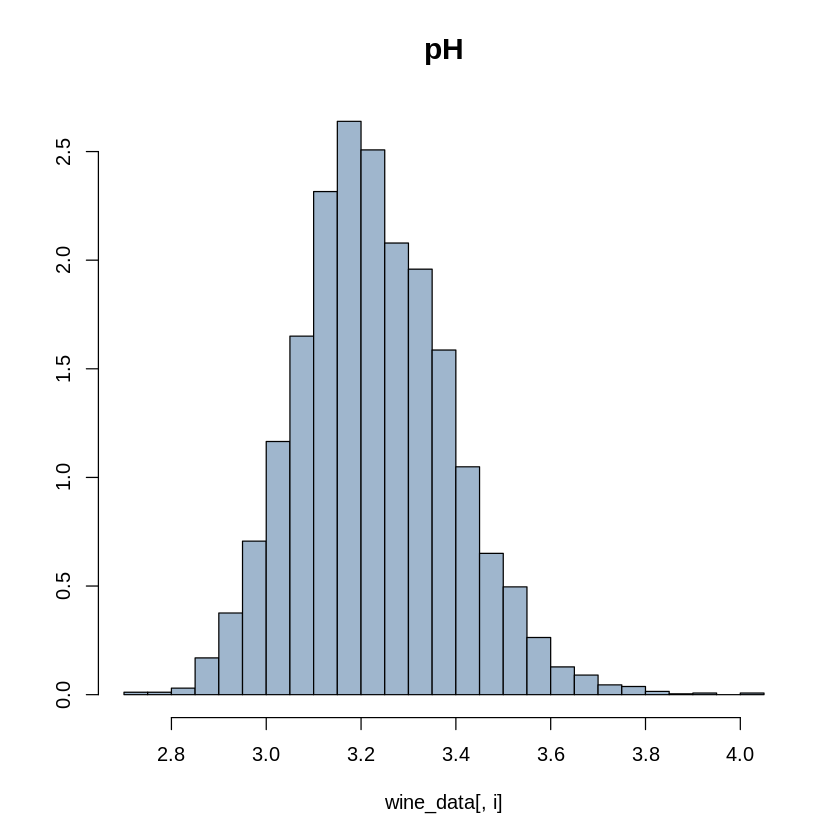

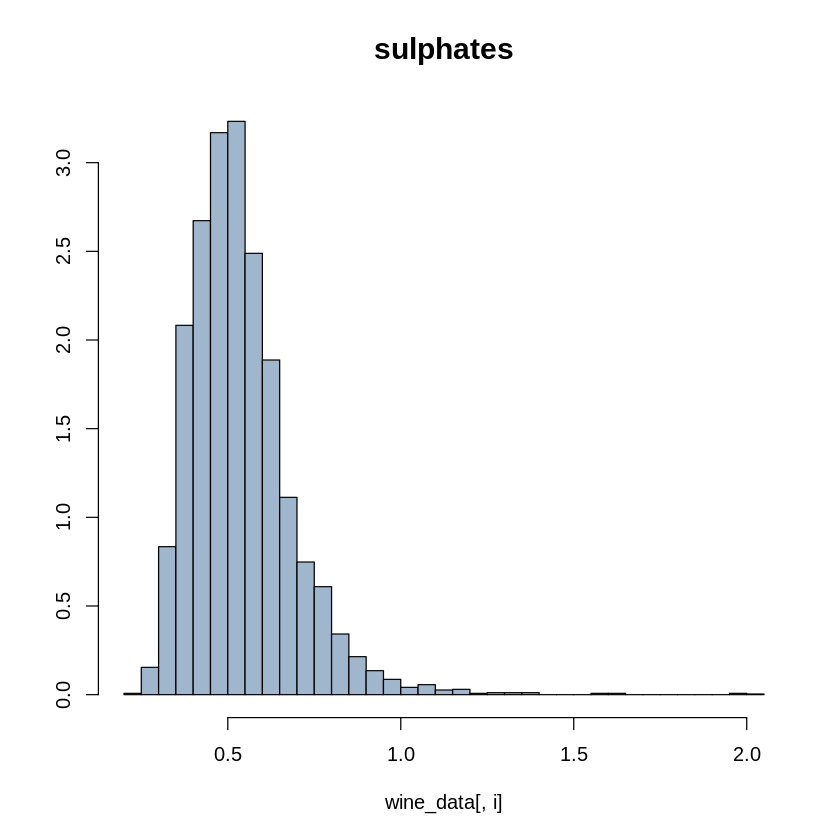

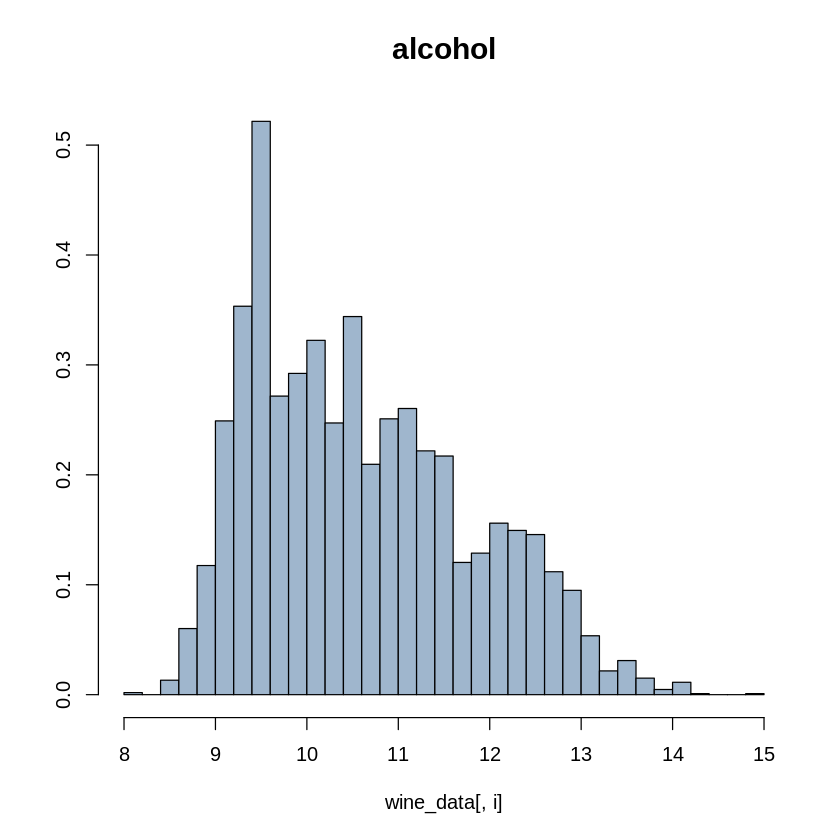

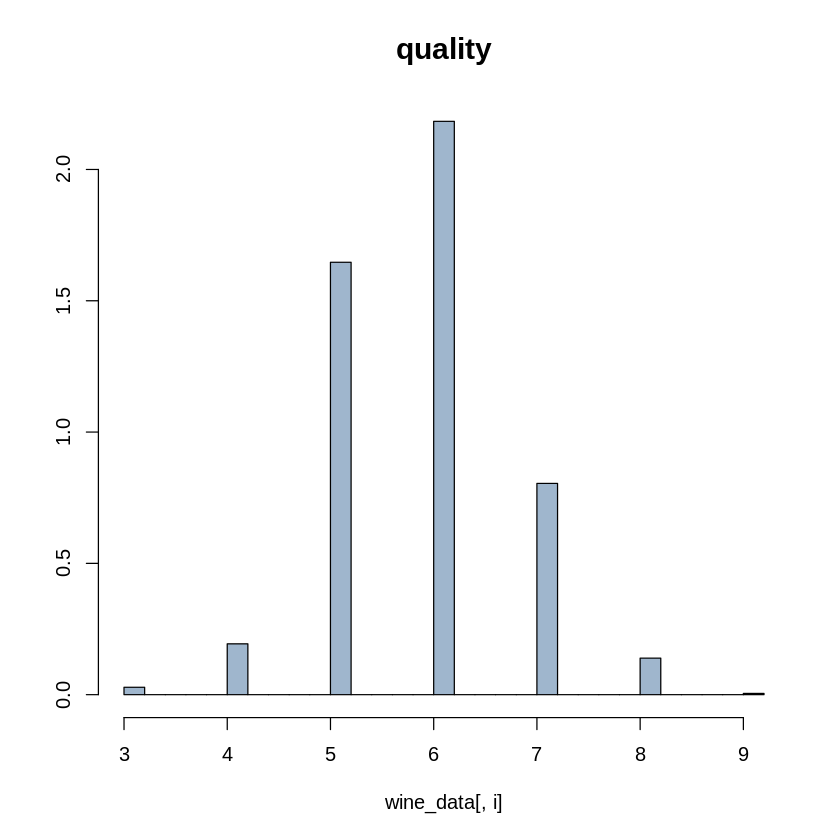

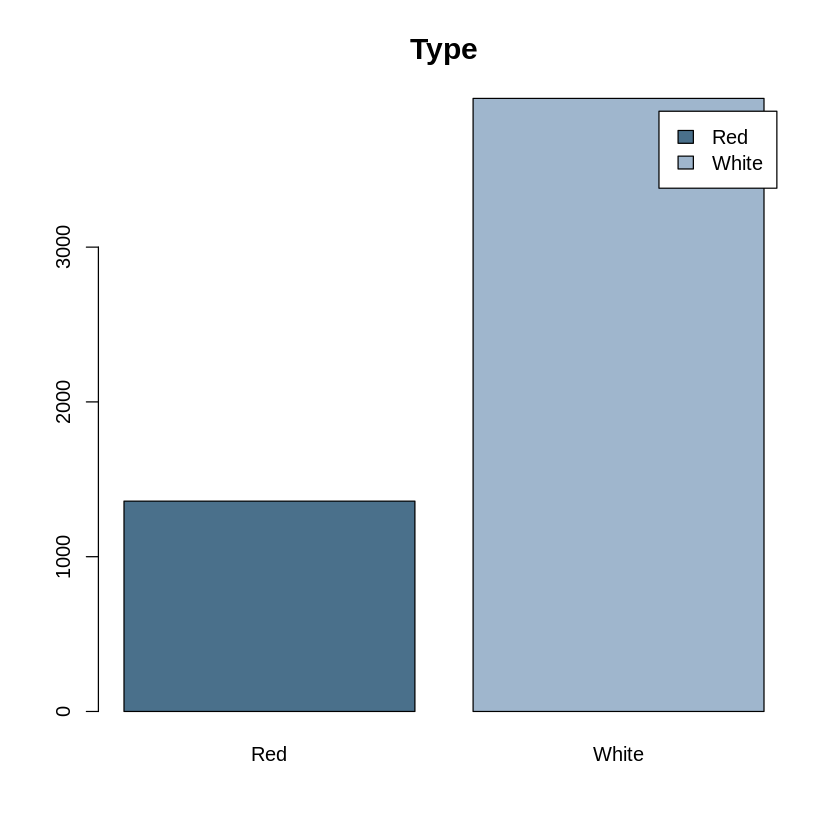

In [70]:
# Plotting the histograms for all variables present in "wine_data" dataframe
for (i in 1:ncol(wine_data)) {
  if (is.numeric(wine_data[, i])) {
    truehist(wine_data[, i], main = names(wine_data)[i], col = "slategray3", cex.main = 1.5)
  } else {
    barplot(table(wine_data[, i]), main = names(wine_data)[i], col = c("skyblue4", "slategray3"), legend.text = TRUE, cex.main = 1.5)
  }
}

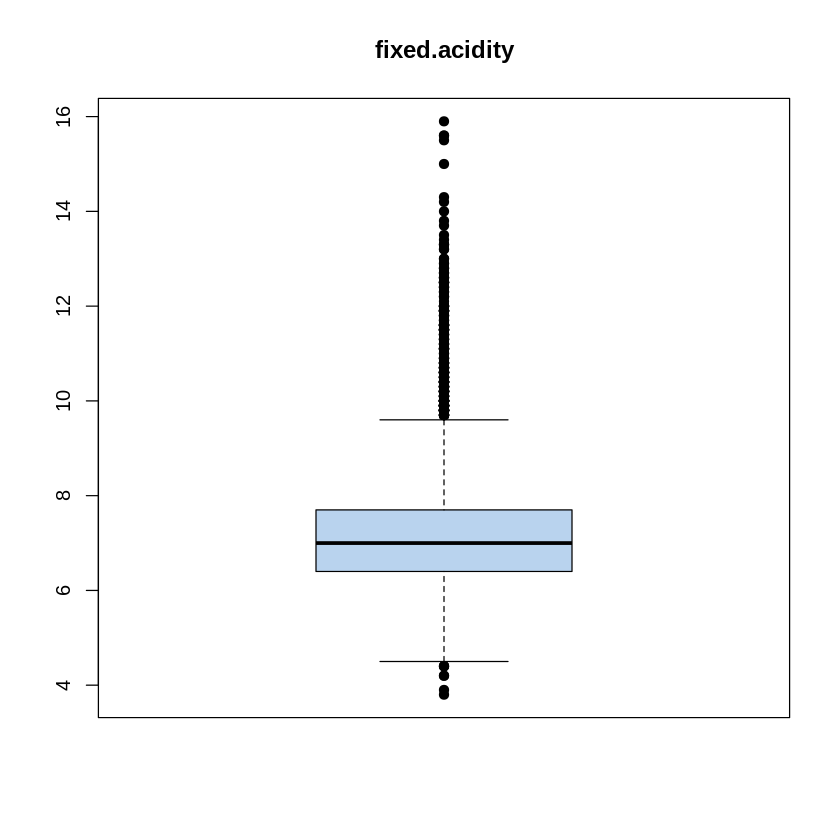

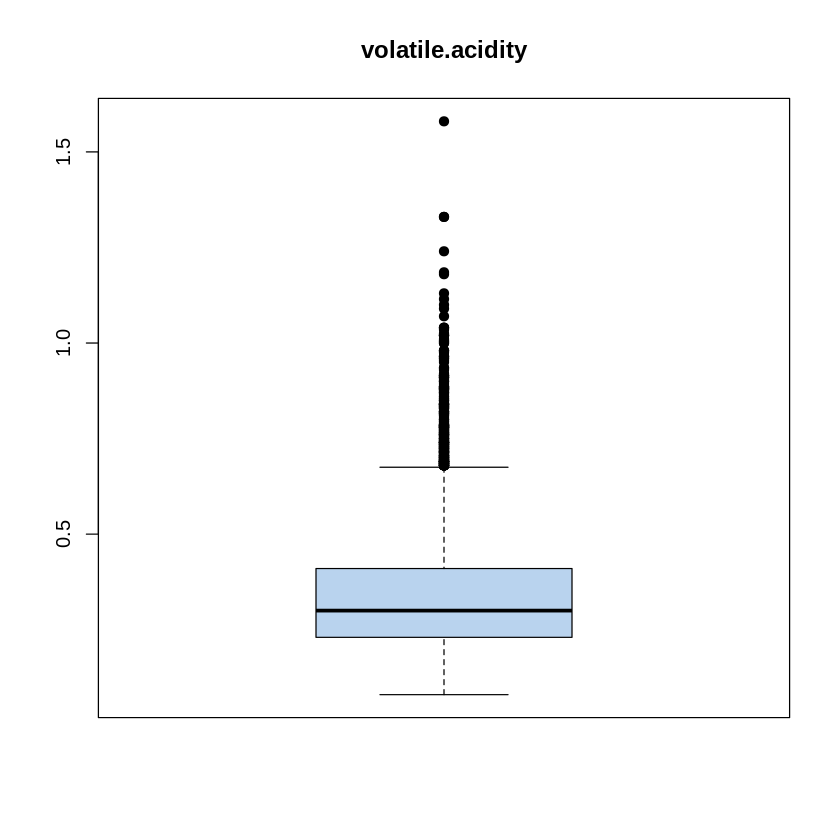

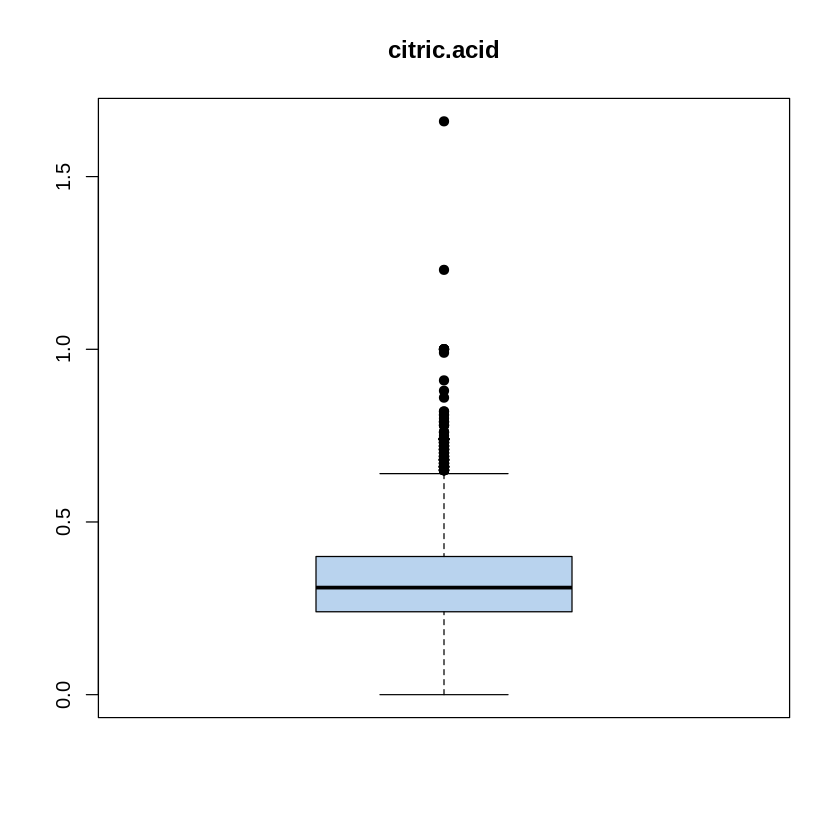

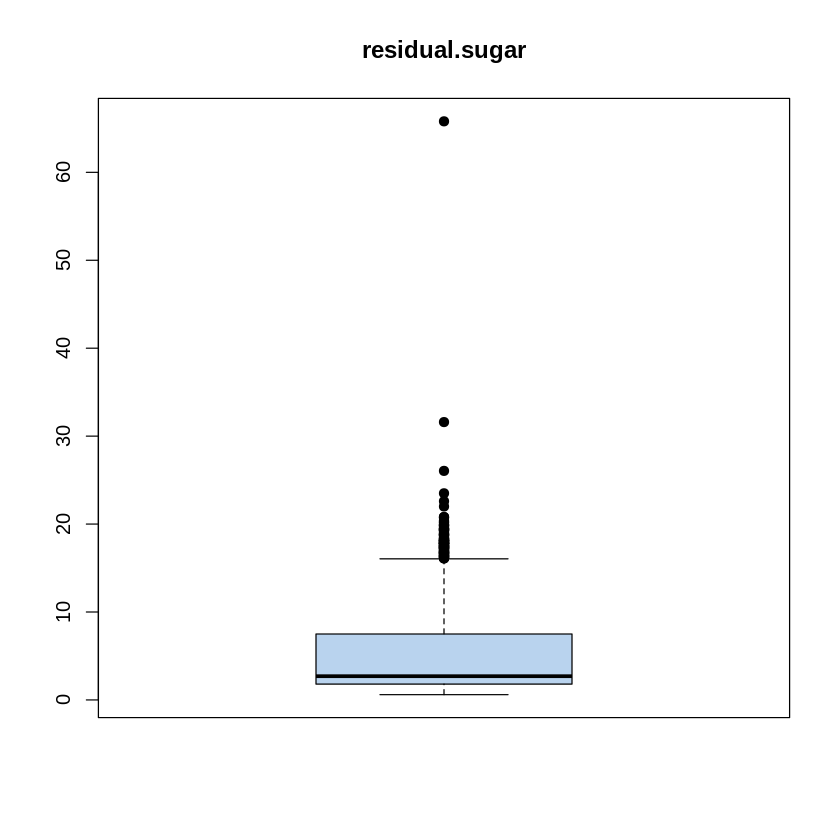

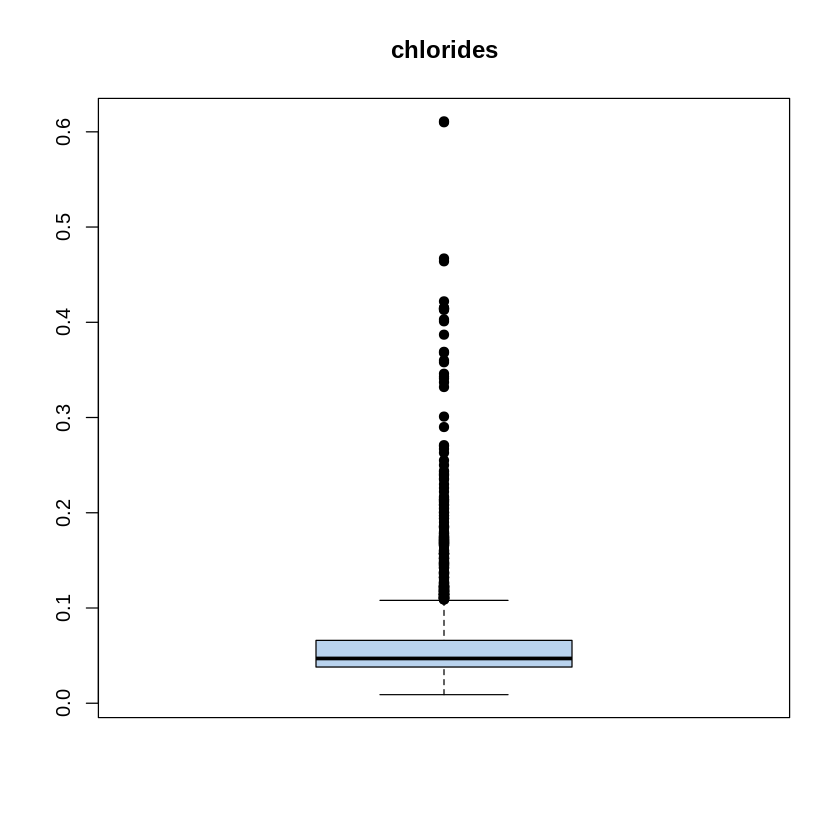

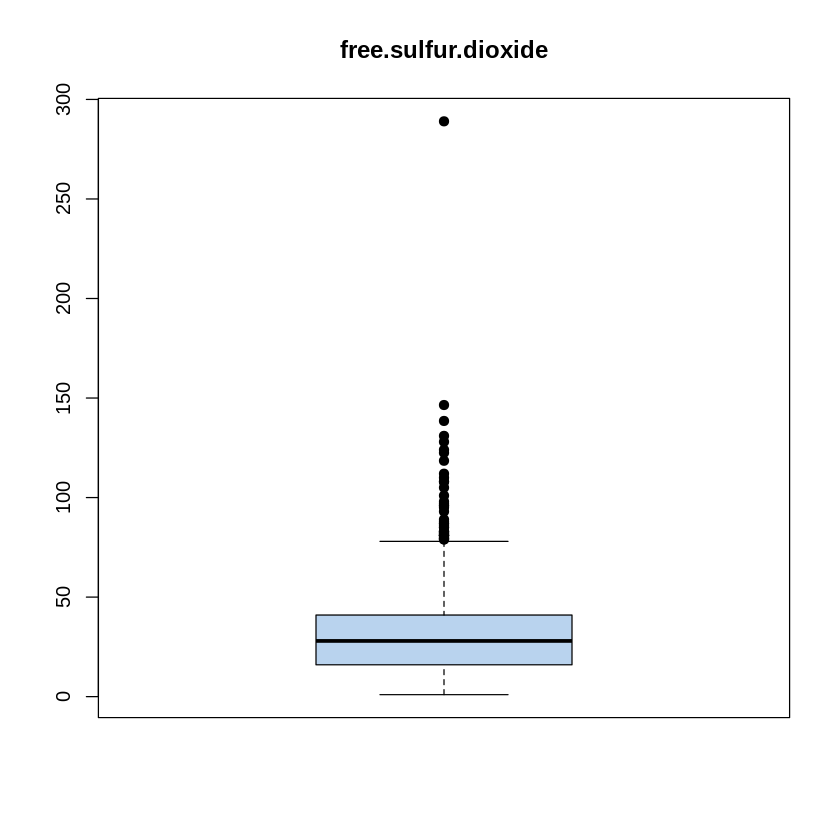

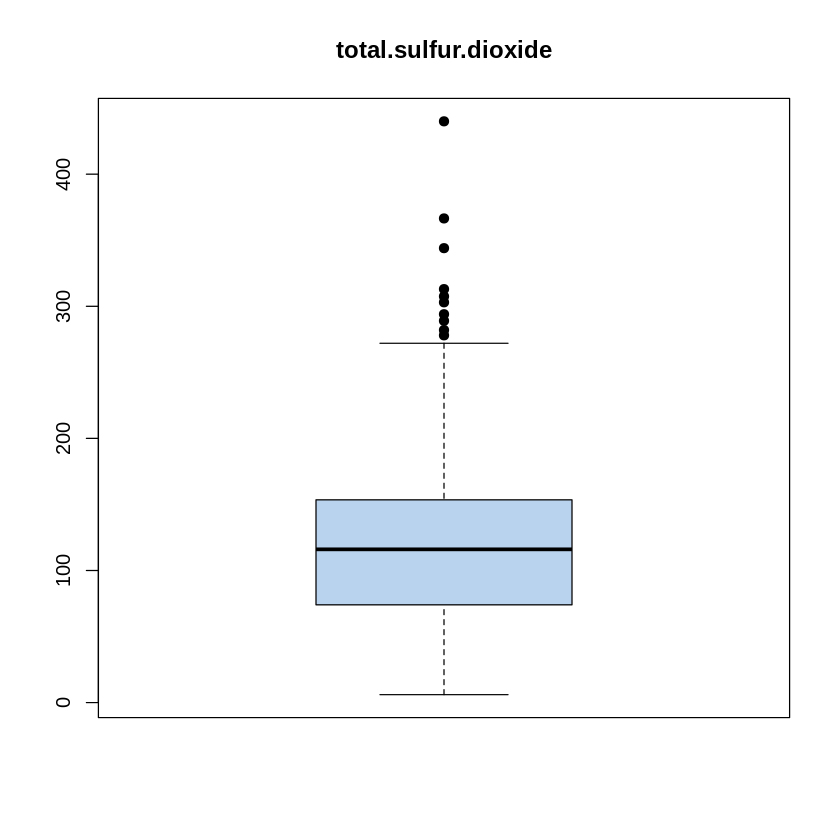

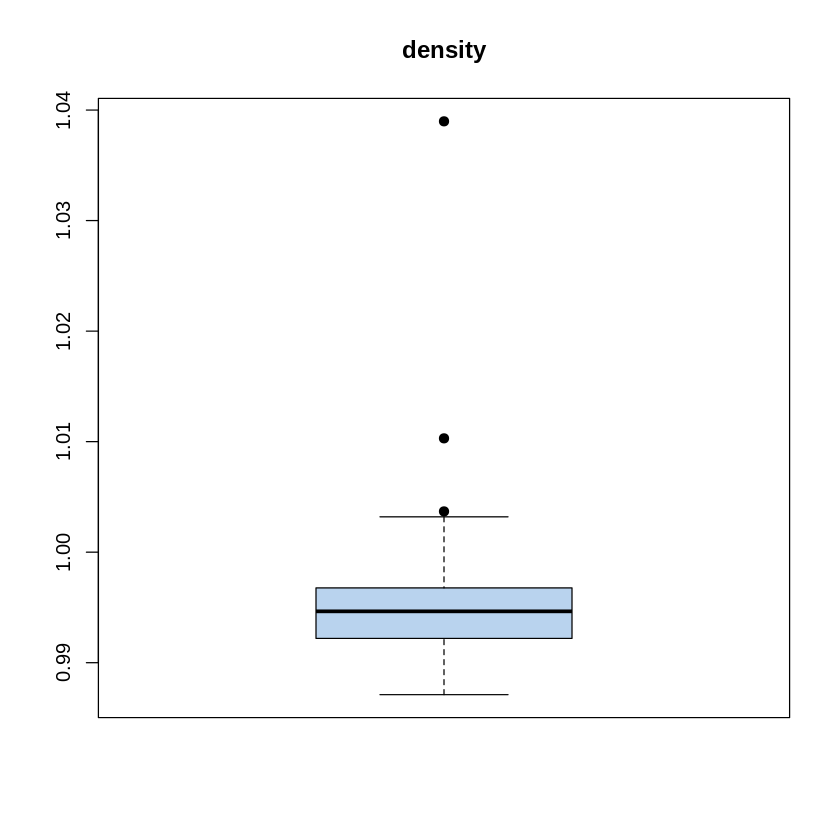

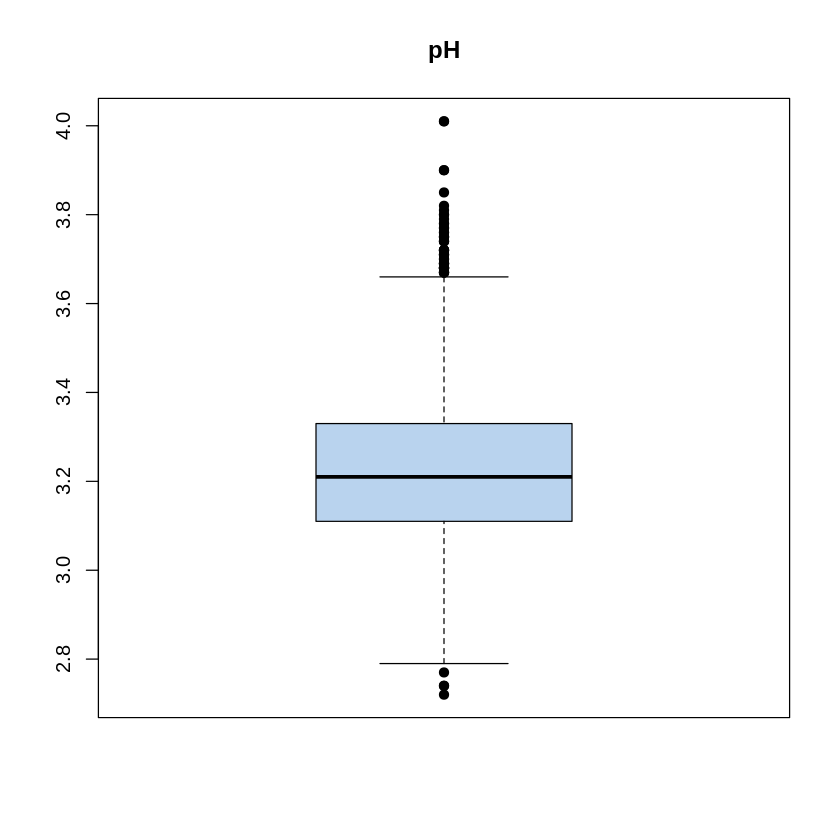

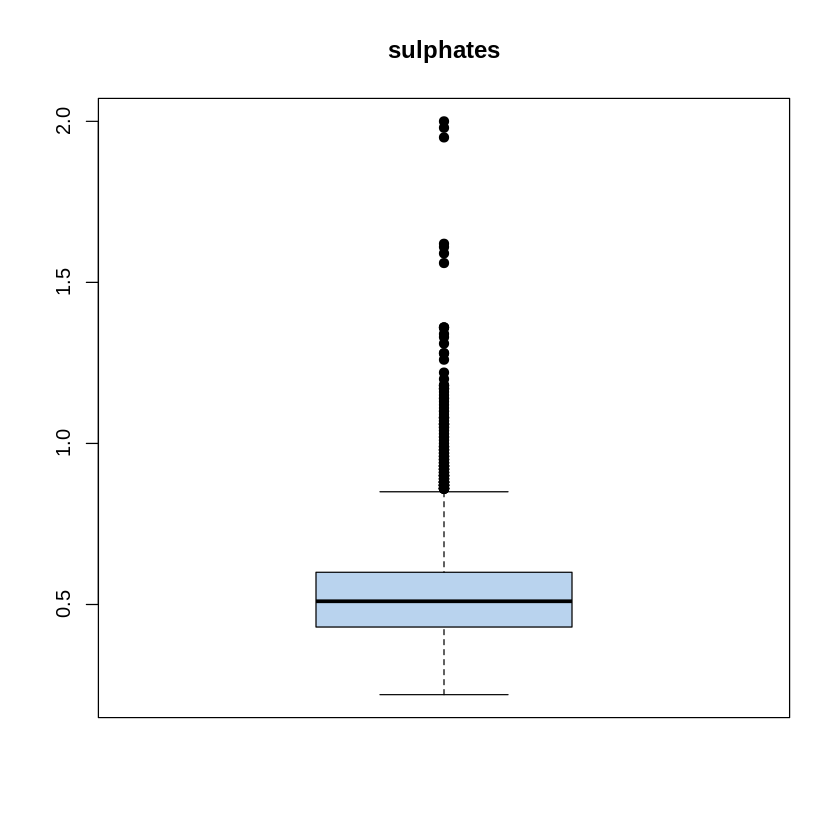

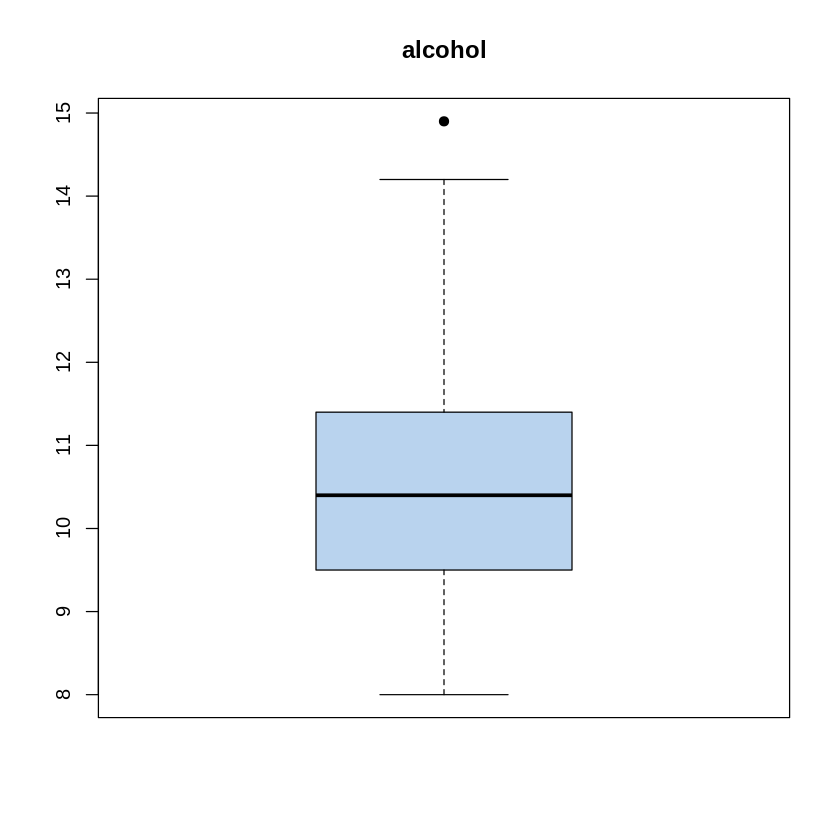

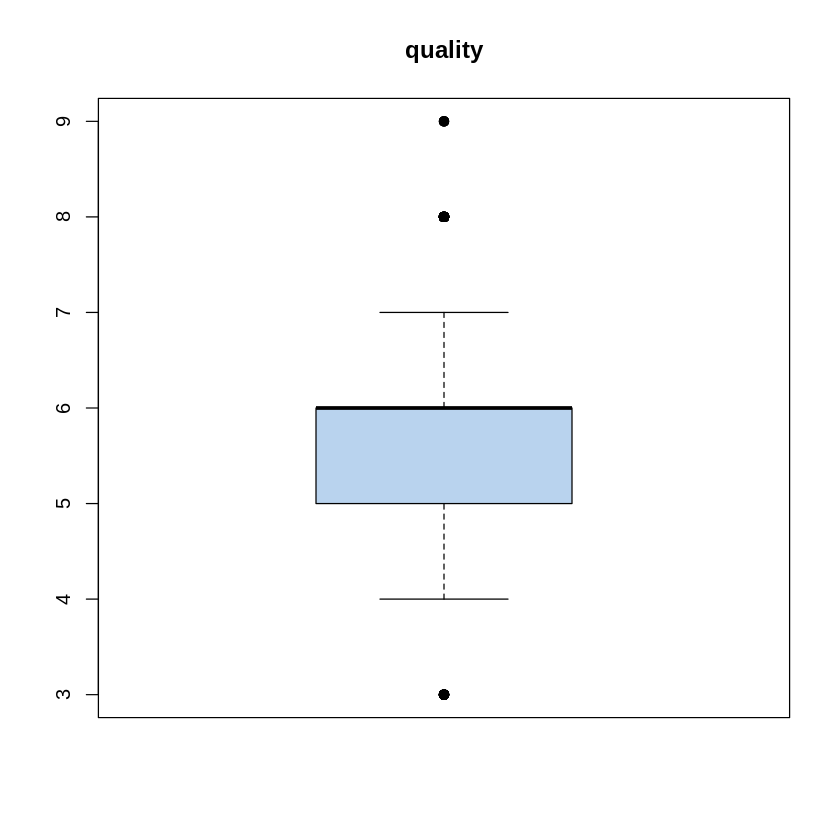

In [71]:
# Plotting Box plots for all numeric variables present in the dataframe.
for (i in 1:ncol(wine_data)) {
  if (is.numeric(wine_data[, i])) {
    boxplot(wine_data[, i], main = names(wine_data)[i], col = "slategray2", pch = 19)
  }
}

Visualizing histogram for the Quality of wine.

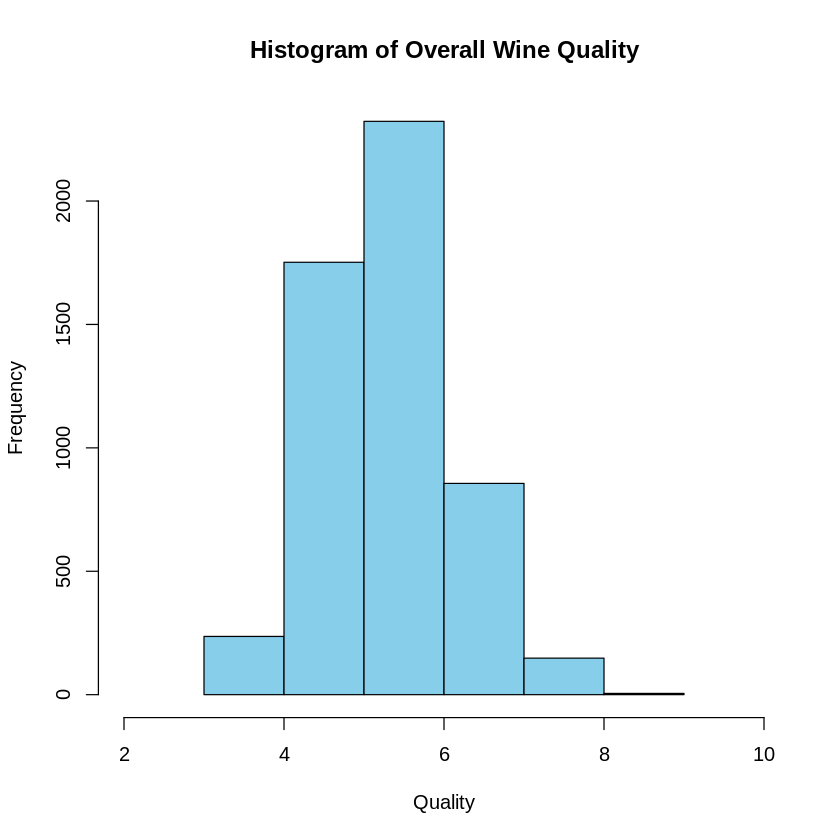

In [72]:
hist(wine_data$quality, xlim = c(2,10), breaks = 6, xlab="Quality", main="Histogram of Overall Wine Quality", col="skyblue")

Visualizing histogram for the Quality of red wine.


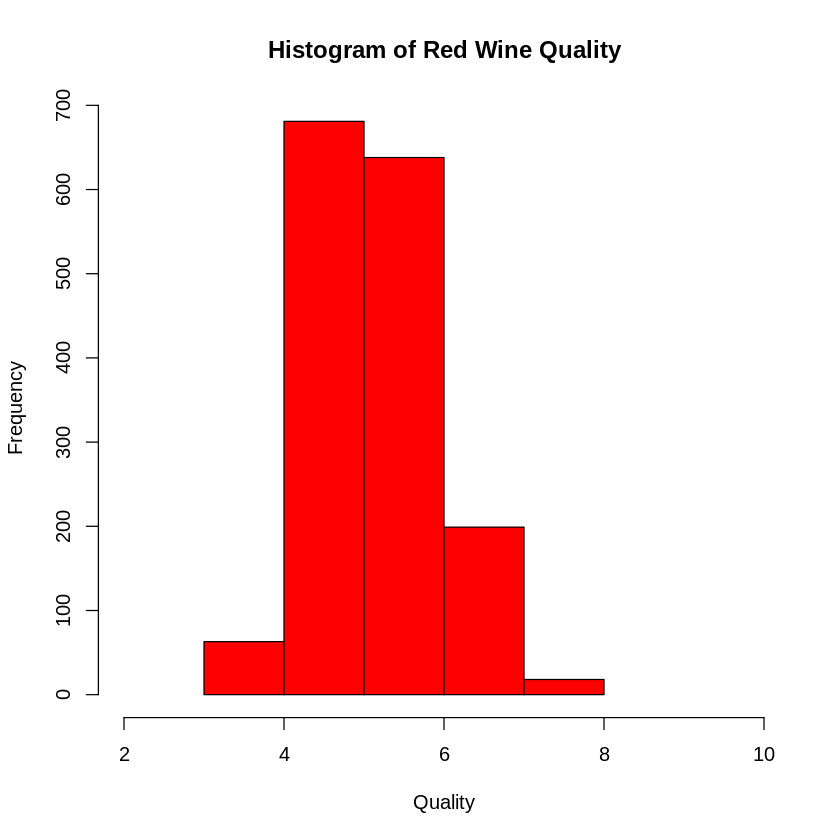

In [73]:
hist(red_wine$quality, xlim = c(2, 10), breaks = 6, xlab="Quality", main="Histogram of Red Wine Quality", col="Red")

Visualizing histogram for the Quality of white wine.

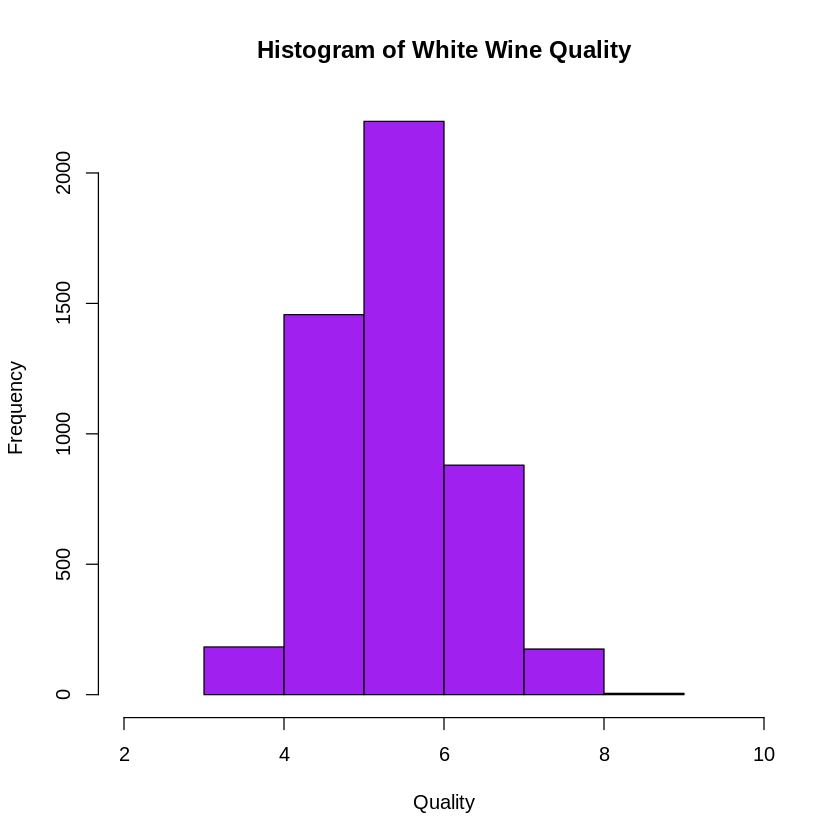

In [74]:
hist(white_wine$quality, xlim = c(2, 10), breaks = 6, xlab="Quality", main="Histogram of White Wine Quality", col="Purple")

Visualizing box plot for the Quality of wine.

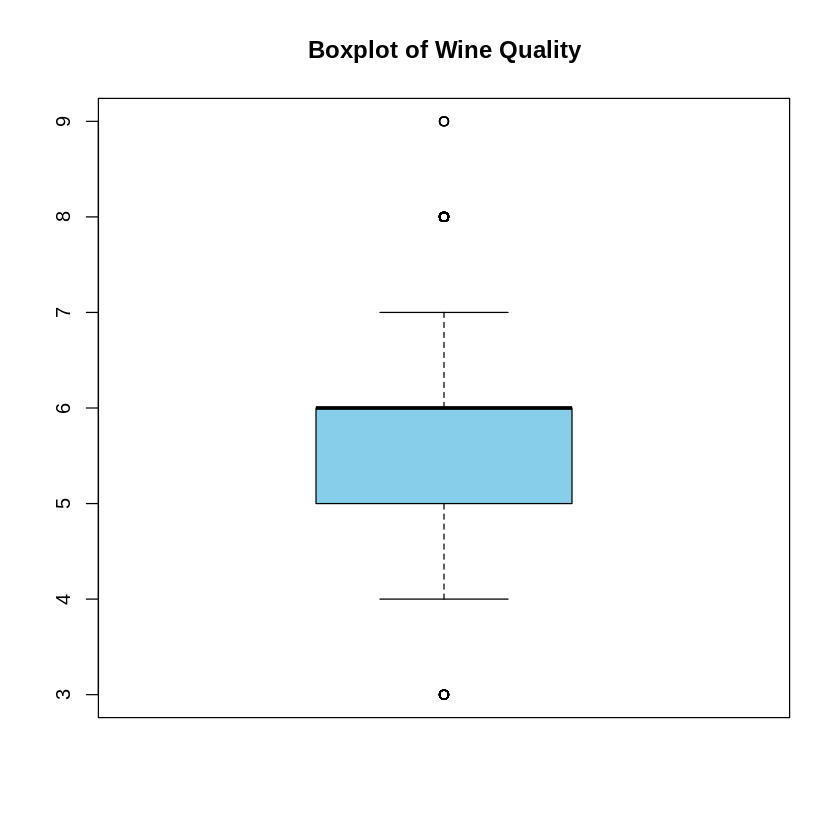

In [75]:
boxplot(wine_data$quality, col="SkyBlue", main="Boxplot of Wine Quality")

Visualizing box plot for the Quality of red wine.

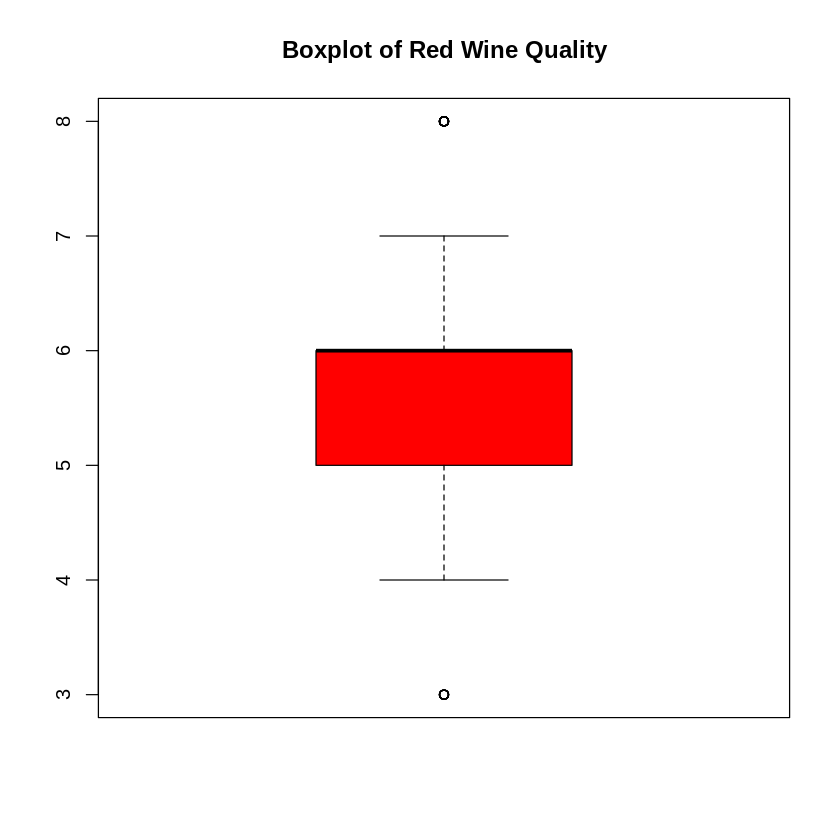

In [76]:
boxplot(red_wine$quality, col="Red", main="Boxplot of Red Wine Quality")

Visualizing box plot for the Quality of white wine.

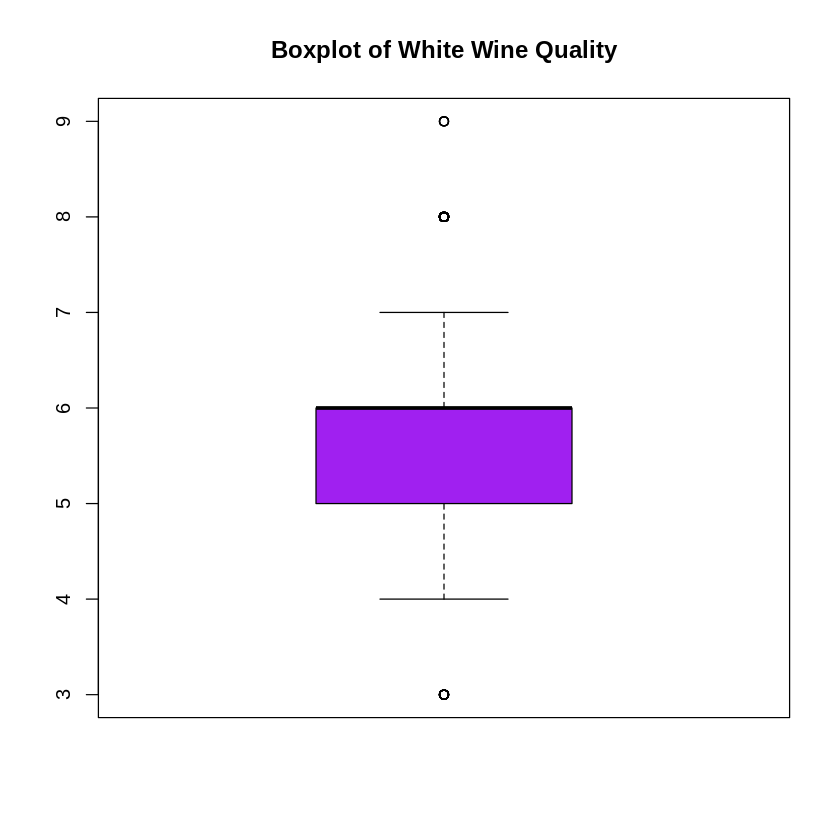

In [77]:
boxplot(white_wine$quality, col="Purple", main="Boxplot of White Wine Quality")

# Residual Sugar

In [78]:
# Summarizing the residual sugar by Type
summary_data <- nc_wine_data %>%
  group_by(Type) %>%
  summarise(mean_sugar = mean(residual.sugar, na.rm = TRUE))

# Viewing the summarized data
print(summary_data)


# A tibble: 2 × 2
  Type  mean_sugar
  <chr>      <dbl>
1 Red         2.54
2 White       6.39


Visualizing histogram for the Residual Sugar of wine.

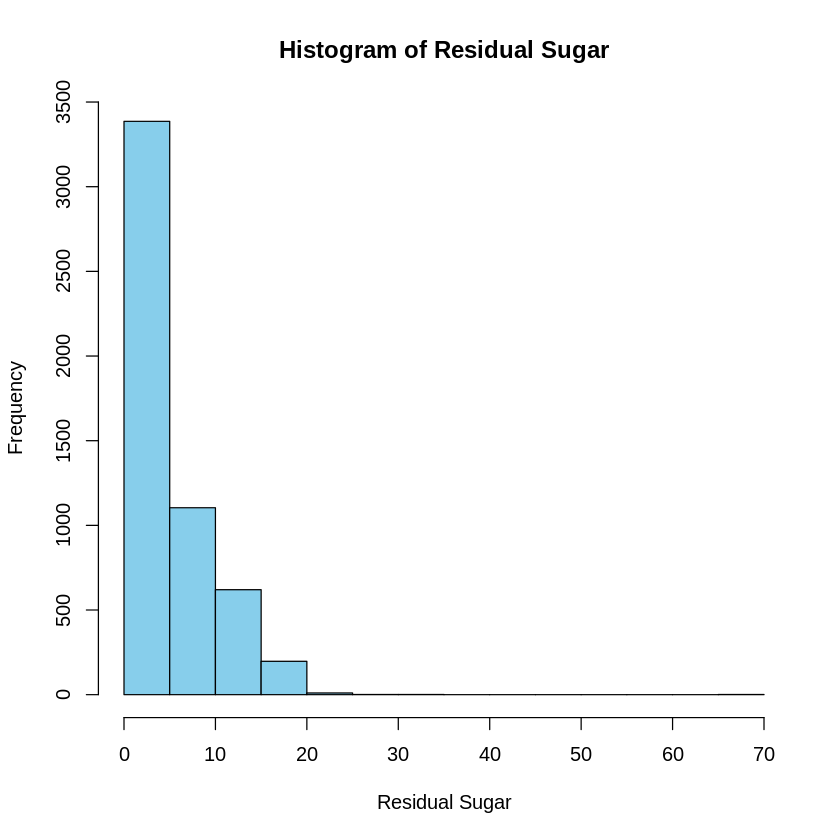

In [79]:
hist(wine_data$residual.sugar, xlab="Residual Sugar", main="Histogram of Residual Sugar", col="SkyBlue")

Visualizing histogram for the Residual Sugar of red wine.

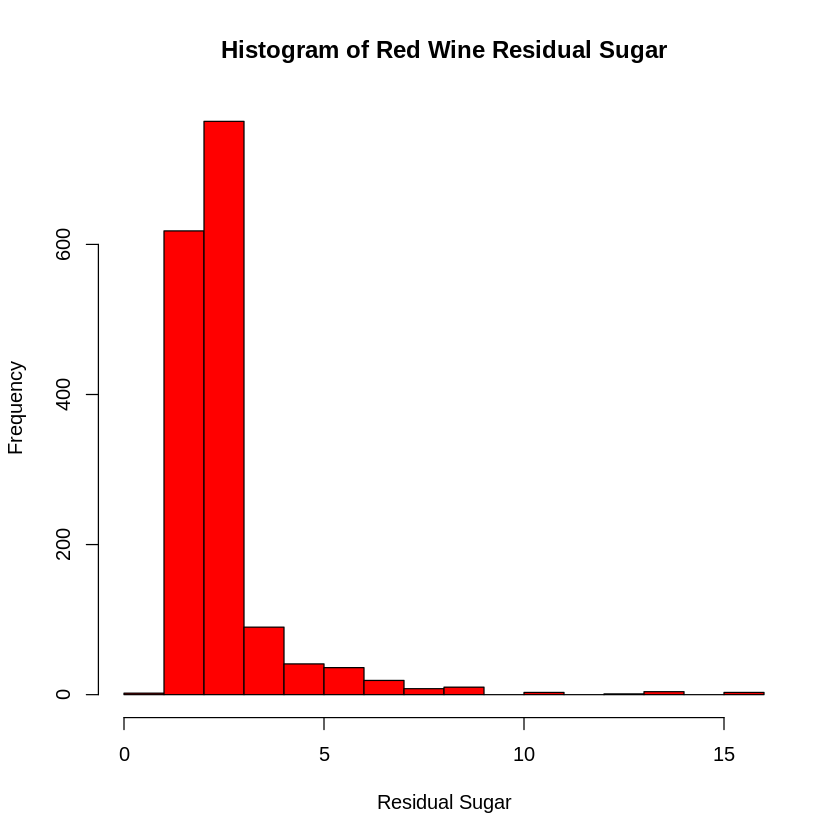

In [80]:
hist(red_wine$residual.sugar, xlab="Residual Sugar", main="Histogram of Red Wine Residual Sugar", col="Red")

Visualizing histogram for the Residual Sugar of white wine.

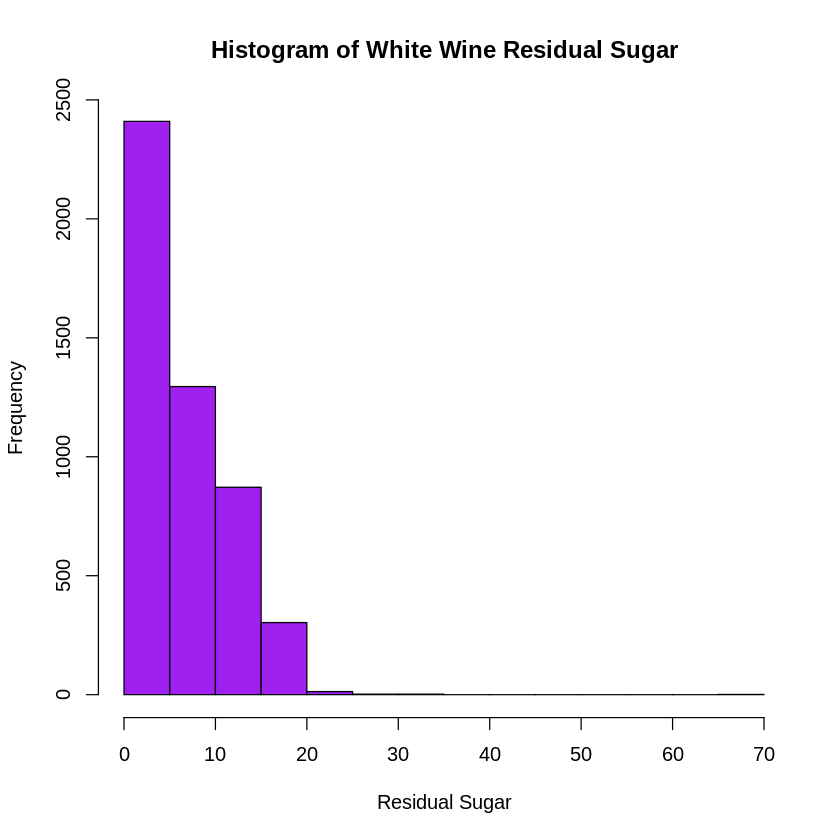

In [81]:
hist(white_wine$residual.sugar, xlab="Residual Sugar", main="Histogram of White Wine Residual Sugar", col="Purple")

Visualizing box plot for the Residual Sugar of wine.

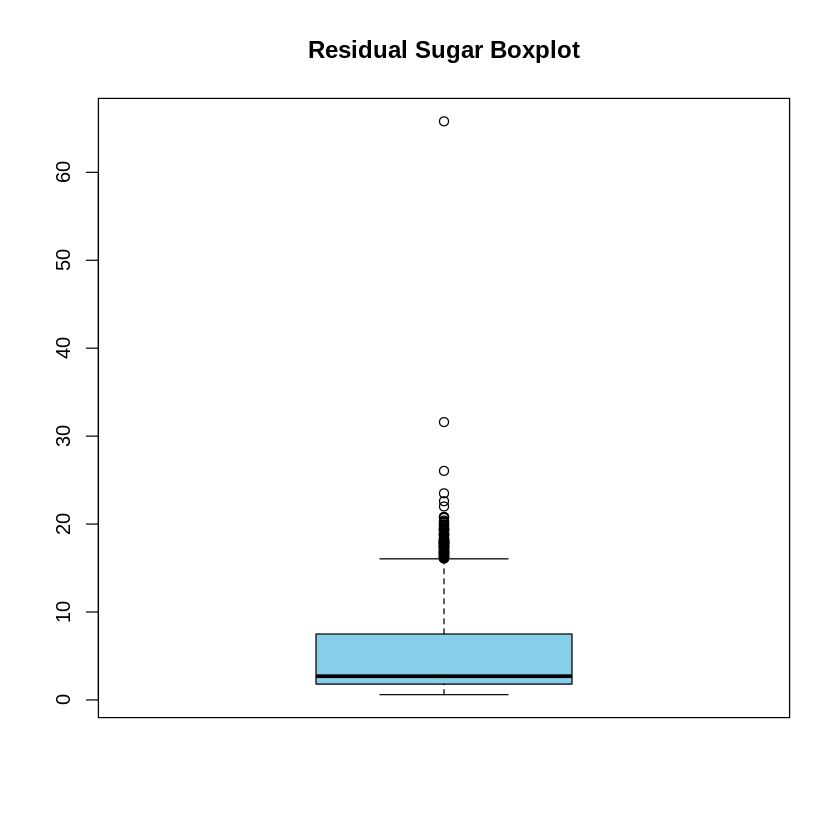

In [82]:
boxplot(wine_data$residual.sugar, col="SkyBlue", main="Residual Sugar Boxplot")

Visualizing box plot for the Residual Sugar of red wine.

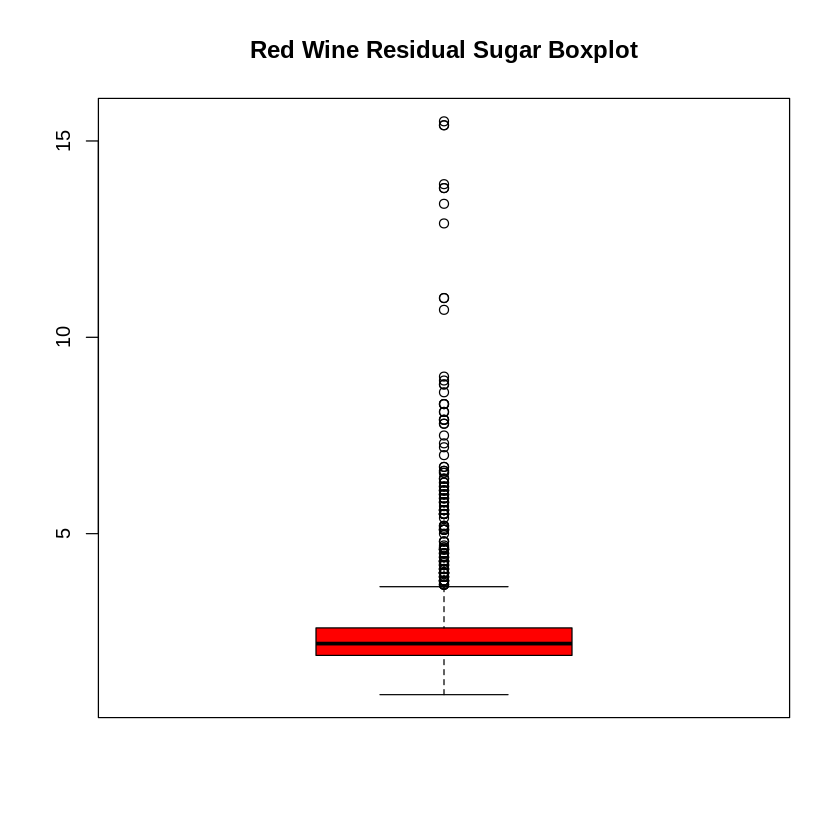

In [83]:
boxplot(red_wine$residual.sugar, col="Red", main="Red Wine Residual Sugar Boxplot")

Visualizing box plot for the Residual Sugar of white wine.

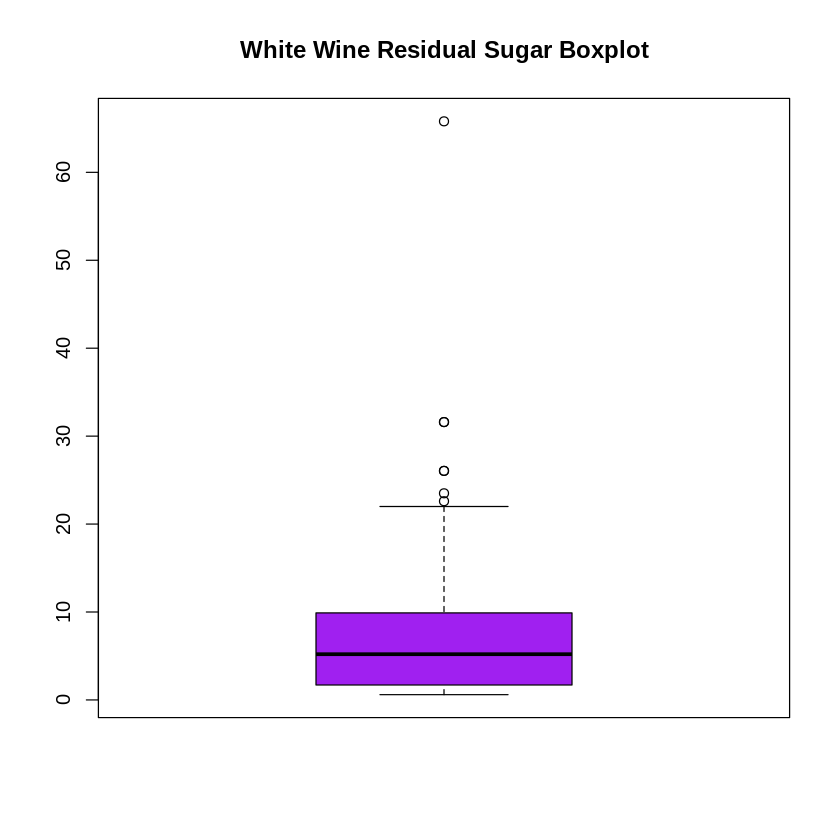

In [84]:
boxplot(white_wine$residual.sugar, col="Purple", main="White Wine Residual Sugar Boxplot")

Alcohol Content in wines

In [85]:
# Calculating mean alcohol content for each color group (i.e. Type)
mean_alcohol <- nc_wine_data %>%
  group_by(Type) %>%
  summarise(alcohol = mean(alcohol, na.rm = TRUE))

# Viewing the mean alcohol content
print(mean_alcohol)

# A tibble: 2 × 2
  Type  alcohol
  <chr>   <dbl>
1 Red      10.4
2 White    10.5


Visualizing histogram for the Alcohol Content of wine.

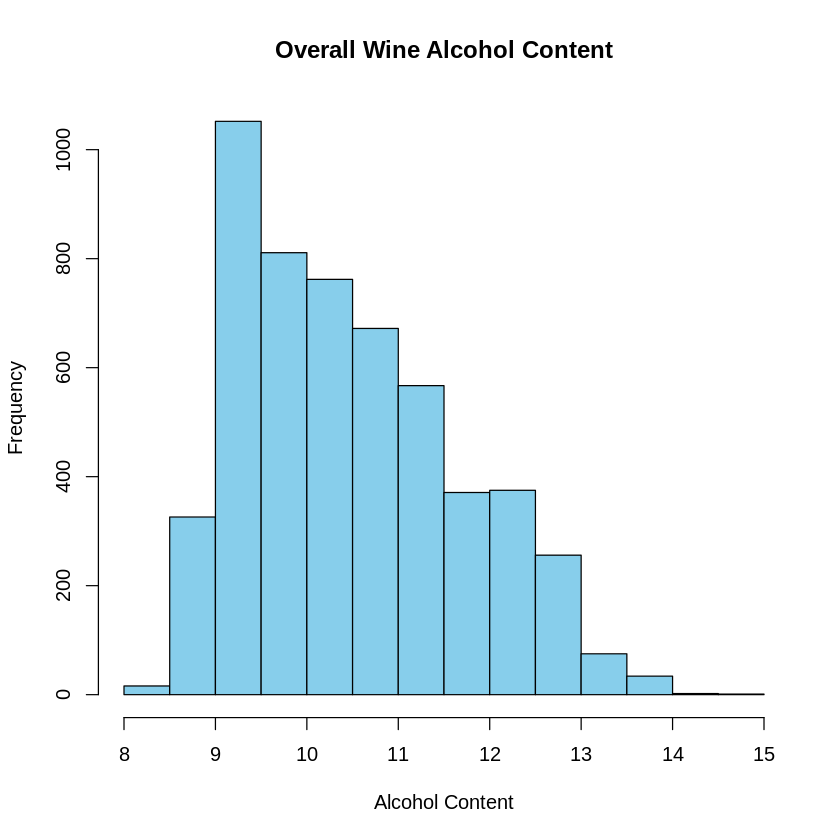

In [86]:
hist(wine_data$alcohol, xlab="Alcohol Content", main="Overall Wine Alcohol Content", col="SkyBlue")

Visualizing histogram for the Alcohol Content of red wine.

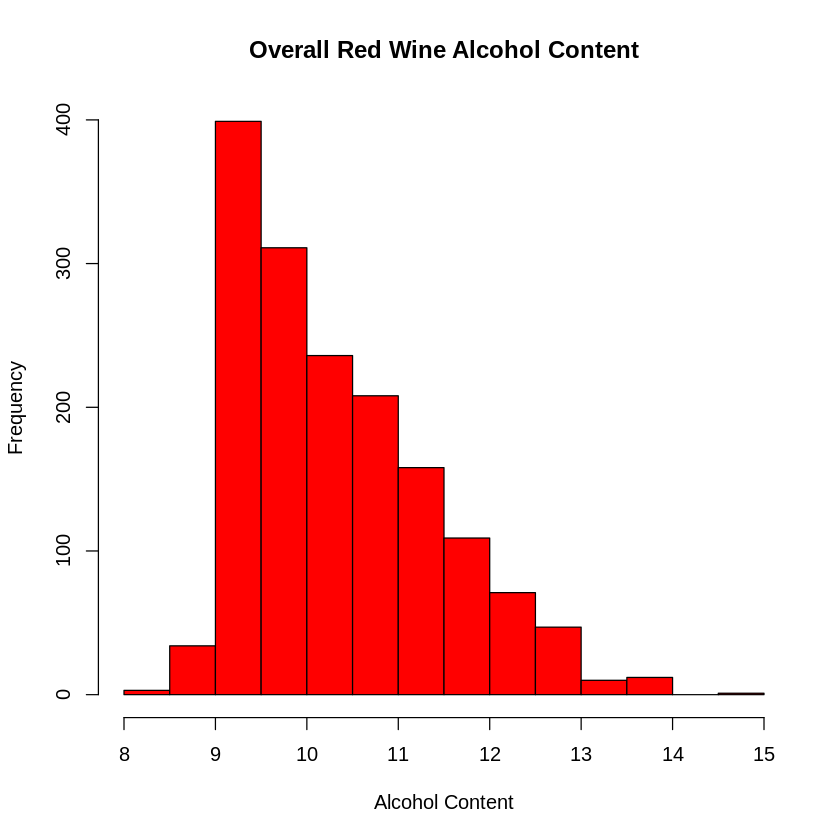

In [87]:
hist(red_wine$alcohol, xlab="Alcohol Content", main="Overall Red Wine Alcohol Content", col="Red")

Visualizing histogram for the Alcohol Content of white wine.

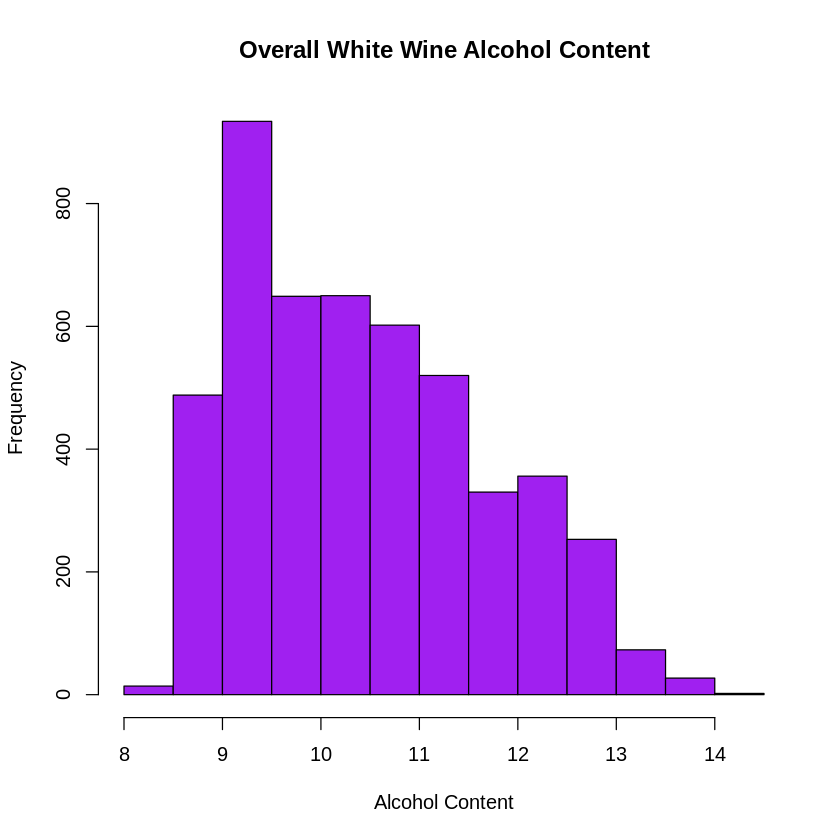

In [88]:
hist(white_wine$alcohol, xlab="Alcohol Content", main="Overall White Wine Alcohol Content", col="Purple")

Visualizing box plot for the Alcohol Content of wine.

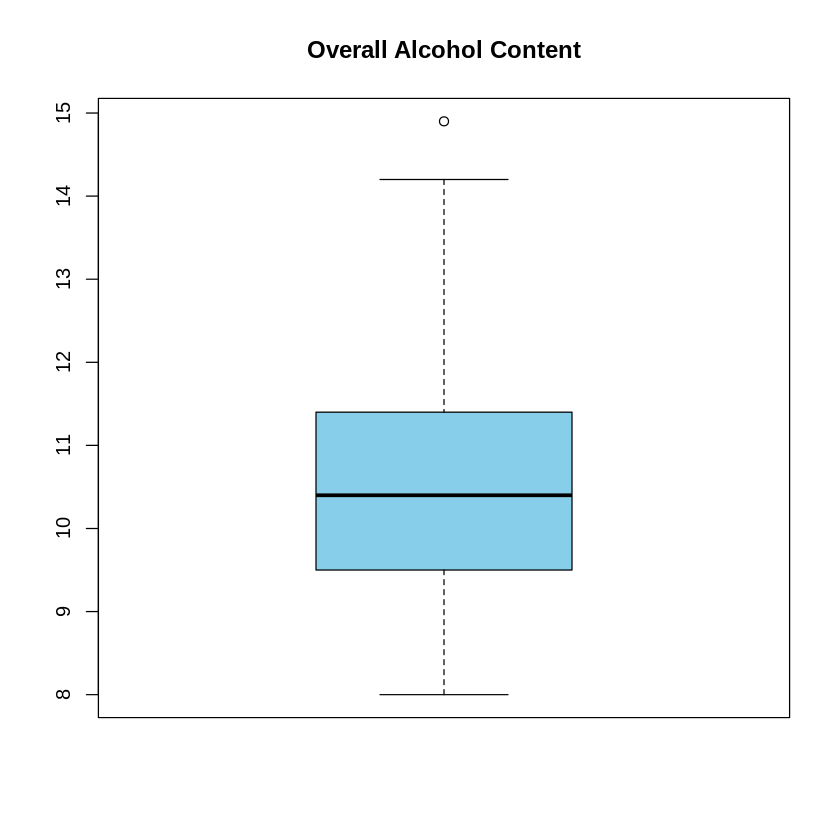

In [89]:
boxplot(wine_data$alcohol, col="SkyBlue",  main="Overall Alcohol Content")

Visualizing box plot for the Alcohol Content of red wine.

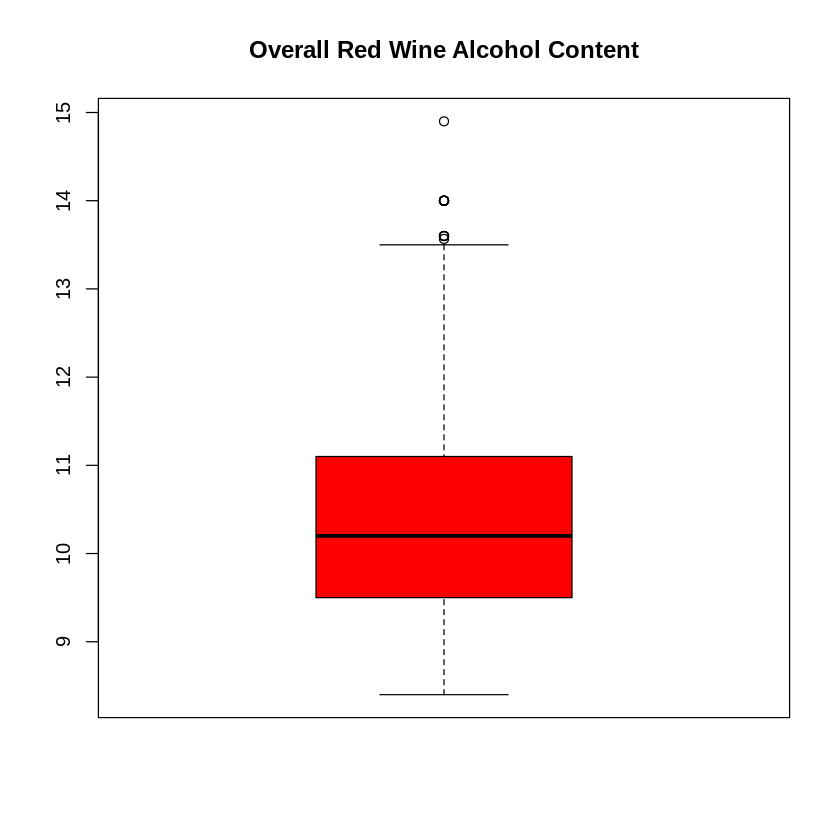

In [90]:
boxplot(red_wine$alcohol, col="Red", main="Overall Red Wine Alcohol Content")

Visualizing box plot for the Alcohol Content of white wine.

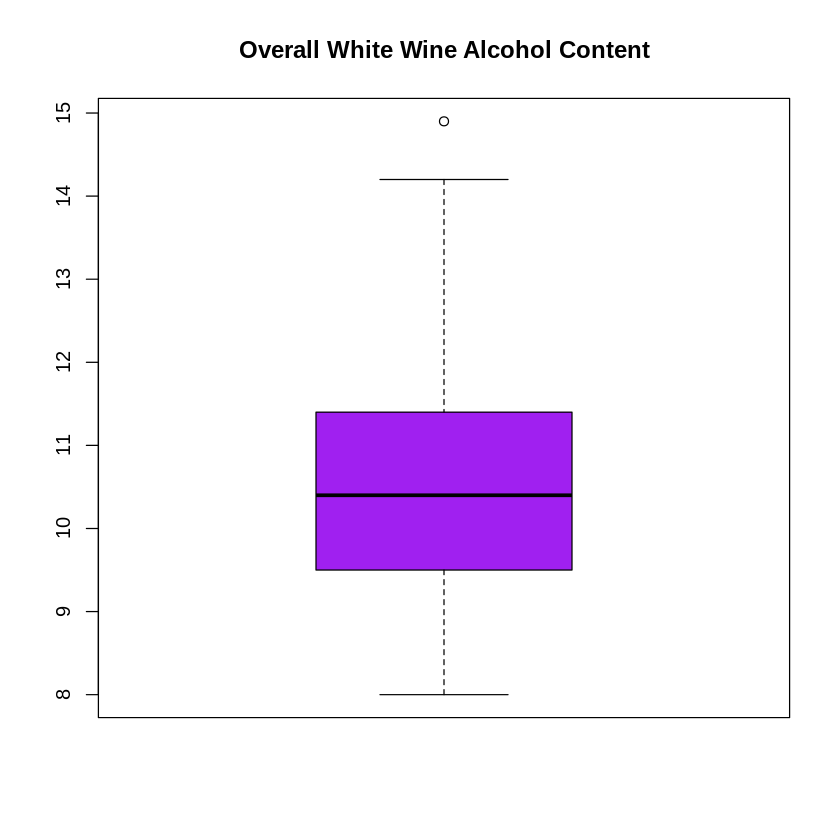

In [91]:
boxplot(wine_data$alcohol, col="Purple", main="Overall White Wine Alcohol Content")

# STATISTICAL TECHNIQUES

1. Hypothesis Testing

In [93]:
# Loading required libraries
library(dplyr)  # For data manipulation
library(ggplot2)  # For data visualization

In [94]:
# Performing Levene's test for equal variances
levene_test_result <- leveneTest(quality ~ Type, data = wine_data)

# Printing the Levene's test result
print(levene_test_result)


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
        Df F value  Pr(>F)  
group    1  3.9541 0.04681 *
      5318                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Welch Two Sample t-test

In [95]:
# Perform t-test to compare mean quality scores of red and white wines
t_test_result <- t.test(quality ~ Type, data = wine_data)

# Print the t-test result
print(t_test_result)


	Welch Two Sample t-test

data:  quality by Type
t = -8.7568, df = 2527, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Red and group White is not equal to 0
95 percent confidence interval:
 -0.2834401 -0.1797244
sample estimates:
  mean in group Red mean in group White 
           5.623252            5.854835 



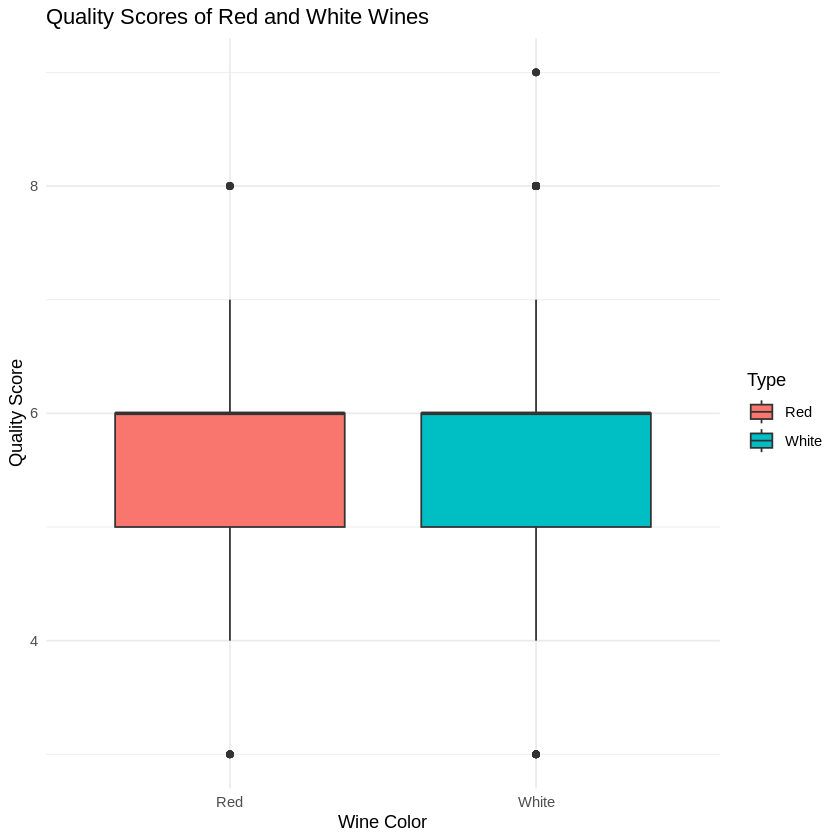

In [96]:
# Visualizing the distribution of quality scores for red and white wines using boxplots
ggplot(wine_data, aes(x = Type, y = quality, fill = Type)) +
  geom_boxplot() +
  labs(title = "Quality Scores of Red and White Wines",
       x = "Wine Color",
       y = "Quality Score") +
  theme_minimal()

Here we are visualizing the distribution of quality scores for red and white wines using boxplots.

2. Hypothesis Testing with Randomization:

In [97]:
# Installing the required packages here
install.packages("perm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [98]:
# Loading required libraries
library(perm)

In [99]:
# Performing the randomization test to comparing mean quality scores of red and white wines
randomization_test_result <- permTS(quality ~ Type, data = wine_data, nperm = 1000)

# Printing the randomization test result
print(randomization_test_result)


	Permutation Test using Asymptotic Approximation

data:  quality by Type
Z = -8.3732, p-value < 2.2e-16
alternative hypothesis: true mean Type=Red - mean Type=White is not equal to 0
sample estimates:
mean Type=Red - mean Type=White 
                     -0.2315822 



3. Confidence Interval

In [100]:
# Calculating the confidence intervals for mean quality scores of red and white wines
confidence_intervals <- tapply(wine_data$quality, wine_data$Type, function(x) t.test(x)$conf.int)

# Printing the confidence intervals
print(confidence_intervals)

$Red
[1] 5.579427 5.667078
attr(,"conf.level")
[1] 0.95

$White
[1] 5.827089 5.882581
attr(,"conf.level")
[1] 0.95



In [101]:
# Confidence Intervals (Bootstrapping)
# Bootstrapping for mean quality score
boot_mean <- function(data, indices) {
  return(mean(data[indices, "quality"]))
}
boot_result <- boot(data = wine_data, statistic = boot_mean, R = 1000)
boot_ci_basic <- boot.ci(boot_result, type = "basic")
print("Confidence Intervals (Basic Percentile Method):")
print(boot_ci_basic)

[1] "Confidence Intervals (Basic Percentile Method):"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_result, type = "basic")

Intervals : 
Level      Basic         
95%   ( 5.772,  5.820 )  
Calculations and Intervals on Original Scale


4. Regression Modelling - Fitting Linear Model

In [102]:
# Loading the required libraries
library(stats)

In [103]:
# Fitting a linear regression model to our dataset
lm_model <- lm(quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar +
               chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density +
               pH + sulphates + alcohol, data = wine_data)

# Printing the summary of the model generated
summary(lm_model)


Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol, data = wine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9704 -0.4465 -0.0302  0.4748  3.0536 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.687e+01  1.283e+01   4.434 9.43e-06 ***
fixed.acidity         6.257e-02  1.682e-02   3.719 0.000202 ***
volatile.acidity     -1.195e+00  8.356e-02 -14.305  < 2e-16 ***
citric.acid           8.557e-02  8.784e-02   0.974 0.330006    
residual.sugar        3.761e-02  5.661e-03   6.644 3.35e-11 ***
chlorides            -6.970e-01  3.483e-01  -2.001 0.045402 *  
free.sulfur.dioxide   6.862e-03  8.249e-04   8.318  < 2e-16 ***
total.sulfur.dioxide -2.536e-03  3.031e-04  -8.366  < 2e-16 ***
density              -5.662e+01  1.309e+01  -4.326 1.55e-05 ***
pH                    5.712e-01  9

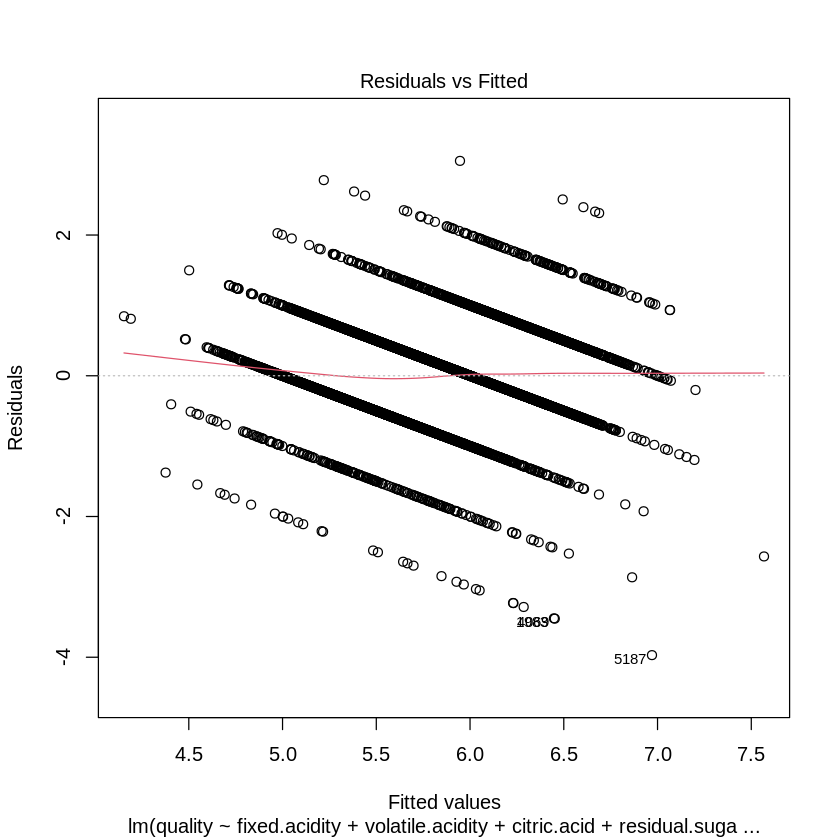

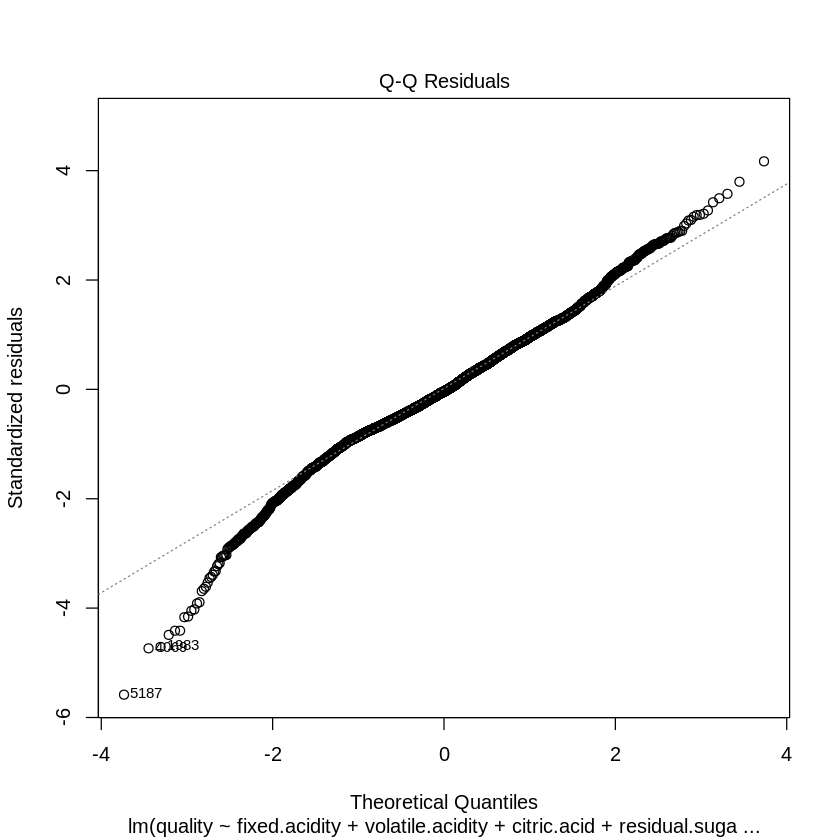

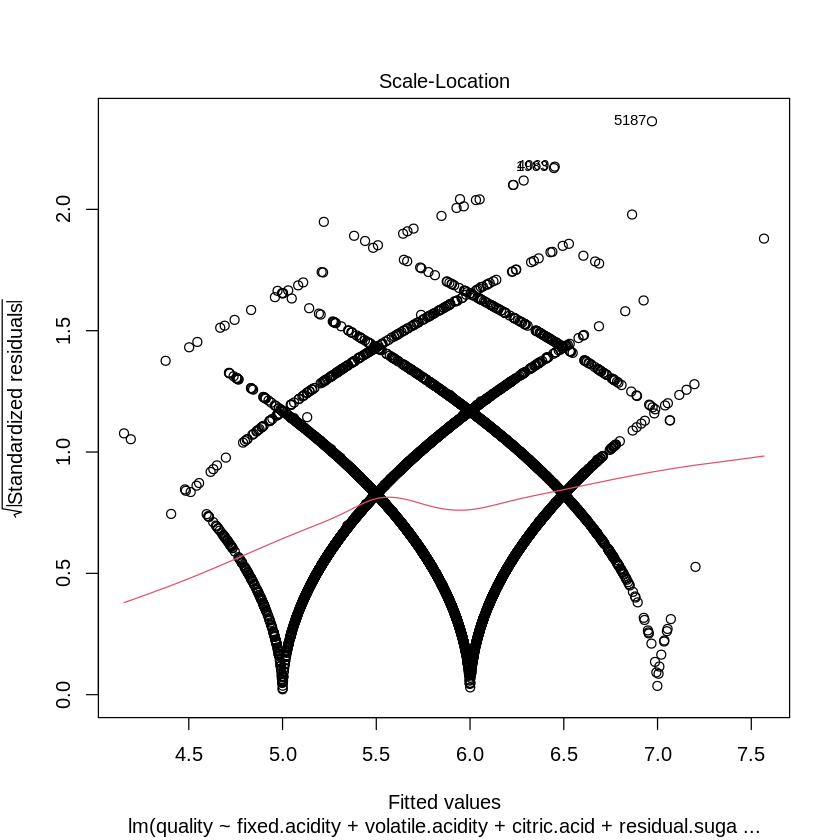

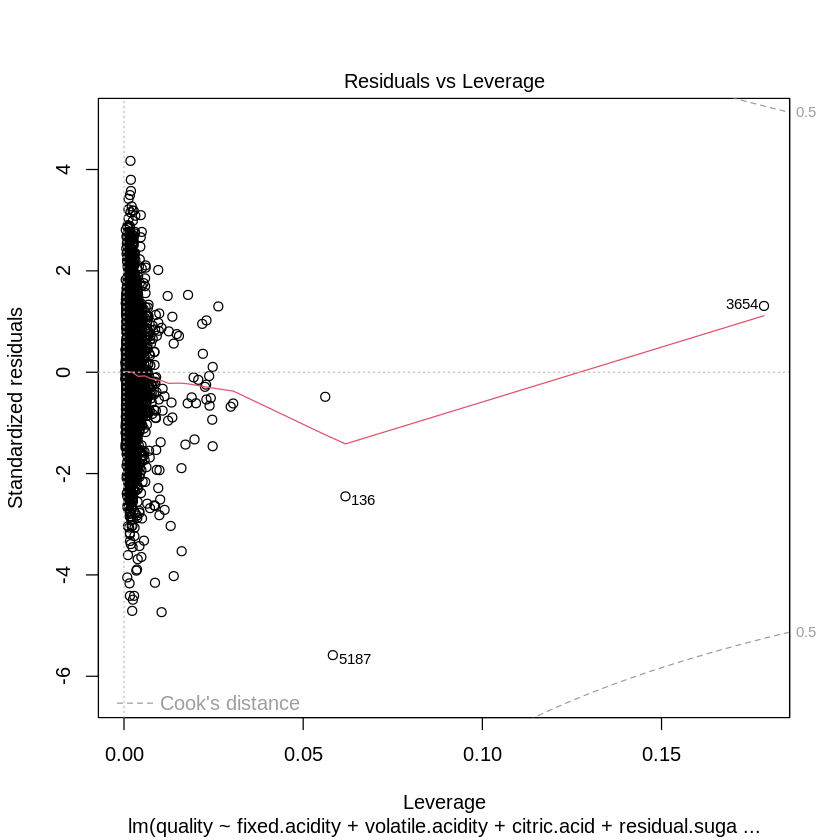

In [104]:
# Plotting the residuals vs. fitted values plot
plot(lm_model)

5. ANOVA

In [105]:
# Performing one-way ANOVA for comparing the mean quality scores between different types of wine (red wine and white wine)
anova_result <- aov(quality ~ Type, data = wine_data)

# Printing ANOVA summary
print("ANOVA:")
print(summary(anova_result))


[1] "ANOVA:"
              Df Sum Sq Mean Sq F value Pr(>F)    
Type           1     54   54.27   71.03 <2e-16 ***
Residuals   5318   4063    0.76                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


6. Model Selection – AIC, BIC, MSPE, R^2, Ra^2

In [106]:
# Fitting the alternative regression models including the model trained above too (lm_model)
lm_model2 <- lm(quality ~ . - density, data = wine_data) # Model 2 trained excluding Density
lm_model3 <- lm(quality ~ . - pH, data = wine_data) # Model 3 trained excluding pH

# Comparing the models using AIC
model_comparison <- AIC(lm_model, lm_model2, lm_model3)
print("Model Comparison:")
print(model_comparison)

[1] "Model Comparison:"
          df      AIC
lm_model  13 11804.58
lm_model2 13 11818.43
lm_model3 13 11815.46


In [107]:
# Creating a data frame for model comparison
comparison_df <- data.frame(
  Model = c("lm_model", "lm_model2", "lm_model3"),
  AIC = model_comparison
)

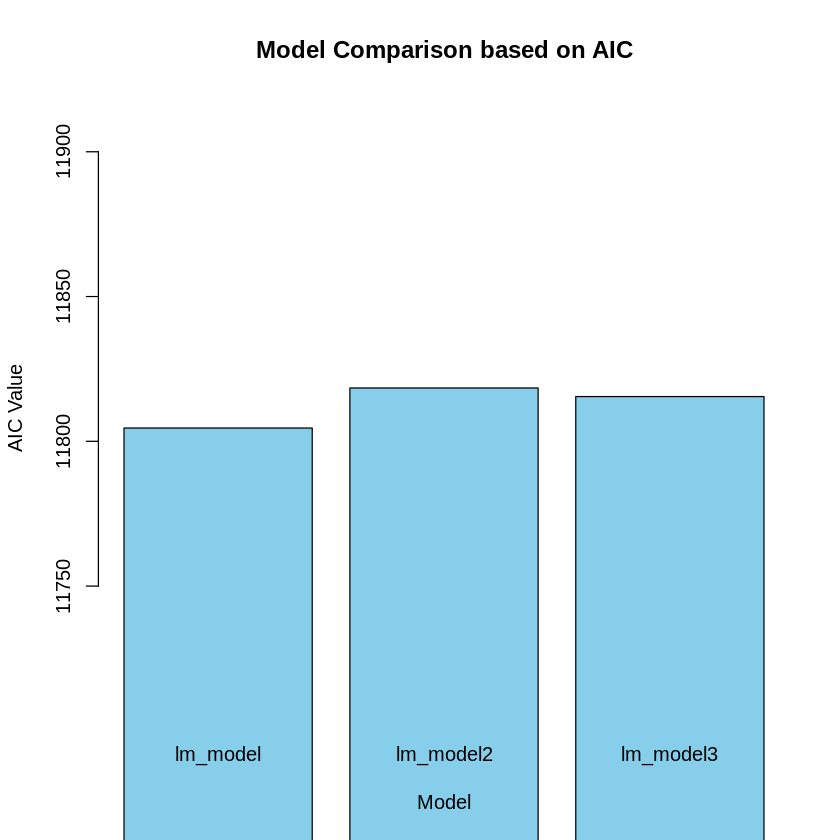

In [108]:
# Extracting AIC values from model comparison
aic_values <- model_comparison$AIC

# Calculating the min and max AIC values
min_aic <- min(aic_values) - 100
max_aic <- max(aic_values) + 100

# Plotting the AIC values
barplot(aic_values, names.arg = comparison_df$Model,
        main = "Model Comparison based on AIC",
        ylab = "AIC Value", xlab = "Model",
        col = "skyblue", ylim = c(min_aic, max_aic))


7. Generalized Linear Modeling

In [109]:
# Fitting a generalized linear model (GLM) to your wine data
glm_model <- glm(quality ~ ., data = wine_data, family = gaussian)

# Getting the summary of the generated GLM model
summary(glm_model)


Call:
glm(formula = quality ~ ., family = gaussian, data = wine_data)

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.994e+01  1.516e+01   6.594 4.69e-11 ***
fixed.acidity         7.703e-02  1.700e-02   4.531 6.00e-06 ***
volatile.acidity     -1.344e+00  8.795e-02 -15.283  < 2e-16 ***
citric.acid           1.236e-01  8.791e-02   1.407  0.15962    
residual.sugar        5.428e-02  6.464e-03   8.399  < 2e-16 ***
chlorides            -9.169e-01  3.498e-01  -2.621  0.00879 ** 
free.sulfur.dioxide   5.867e-03  8.439e-04   6.952 4.03e-12 ***
total.sulfur.dioxide -1.554e-03  3.545e-04  -4.385 1.18e-05 ***
density              -9.962e+01  1.537e+01  -6.481 9.93e-11 ***
pH                    6.172e-01  9.880e-02   6.247 4.52e-10 ***
sulphates             7.463e-01  8.375e-02   8.911  < 2e-16 ***
alcohol               2.303e-01  1.950e-02  11.809  < 2e-16 ***
TypeWhite            -3.219e-01  6.073e-02  -5.301 1.20e-07 ***
---
Signif. codes:

8. Diagnostics of the model – Residual Analysis

[1] "Residuals Analysis:"


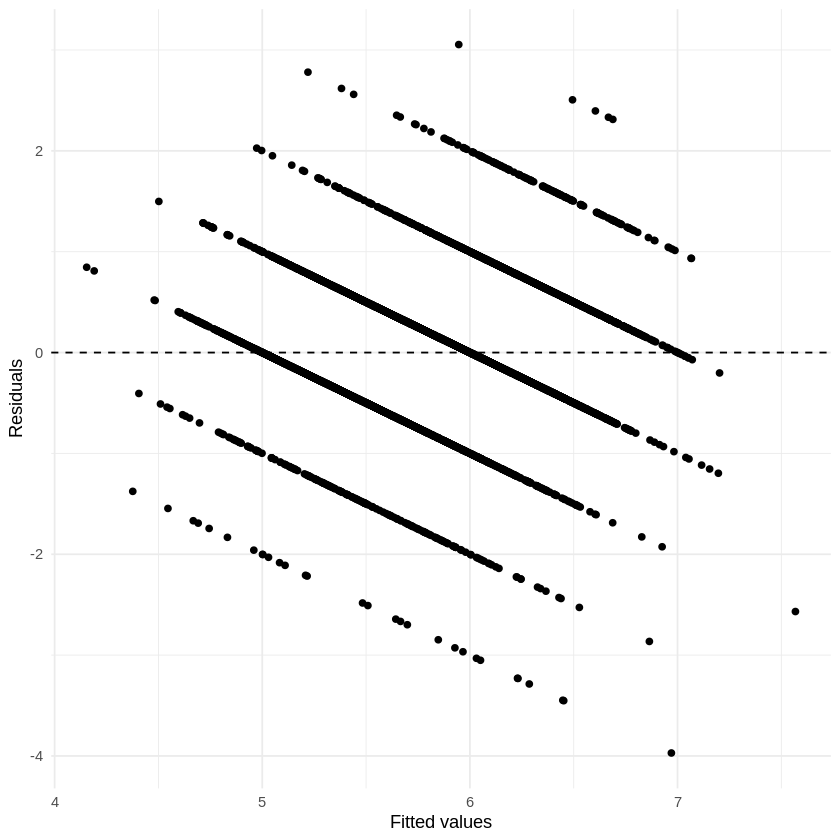

In [110]:
# Residuals analysis

# Calculating residuals and augmenting them to the linear regression model
residuals_lm <- augment(lm_model)


# Creating a scatter plot of fitted values versus residuals
plot_resid <- ggplot(residuals_lm, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals") +
  theme_minimal()

# Printing the residuals analysis plot
print("Residuals Analysis:")
print(plot_resid)

In [111]:
# Fitting the regression model
lm_model <- lm(quality ~ ., data = wine_data)

# Calculating the residuals
residuals <- residuals(lm_model)

In [112]:
# Printing the residual values
print(residuals)

            1             2             3             4             5 
 3.775879e-02  1.102666e-01 -1.446144e-03  2.444505e-01 -1.390249e-02 
            6             7             8             9            10 
-5.255986e-02  1.646781e+00  1.784328e+00 -7.790117e-01 -1.644512e-02 
           11            12            13            14            15 
-3.772447e-01 -6.575440e-01 -1.840861e-01 -2.292072e-01  9.506553e-01 
           16            17            18            19            20 
-3.225466e-01 -1.047698e+00  5.312226e-01  1.556565e-01 -5.643320e-01 
           21            22            23            24            25 
-5.292417e-01 -1.615830e-01  4.159264e-01 -4.014327e-01 -4.455619e-01 
           26            27            28            29            30 
 3.430994e-02  7.489848e-01 -1.731328e-01  6.177930e-01 -9.928865e-02 
           31            32            33            34            35 
 5.756170e-01 -3.665745e-01  8.660858e-01  5.280876e-01  1.358357e+00 
      

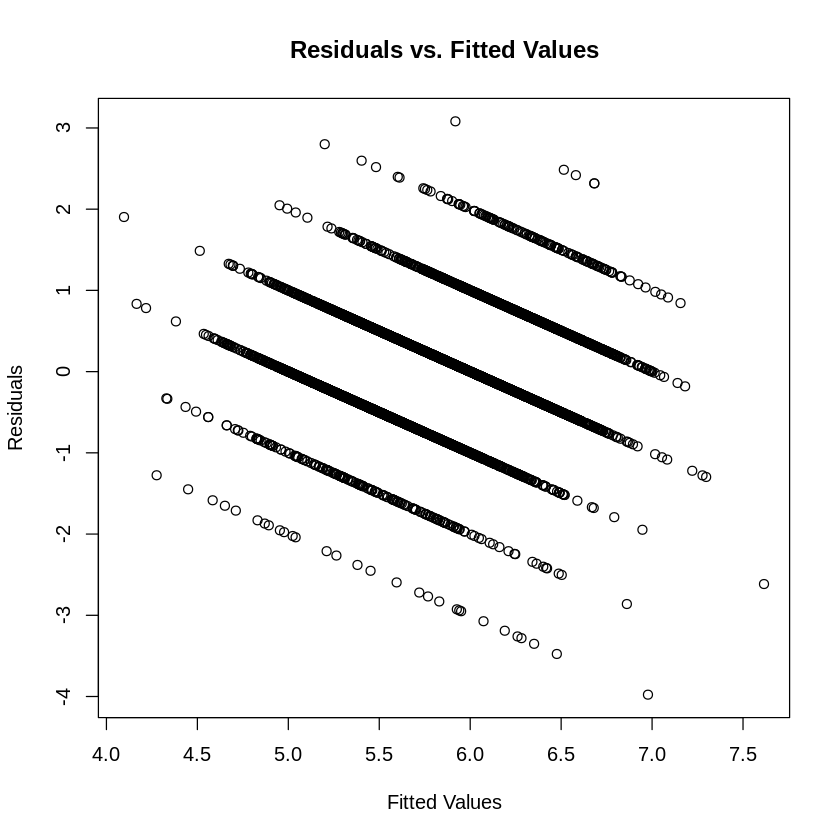

In [113]:
# Plotting Residuals vs. Fitted Values graph
plot(lm_model$fitted.values, residuals,
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values")

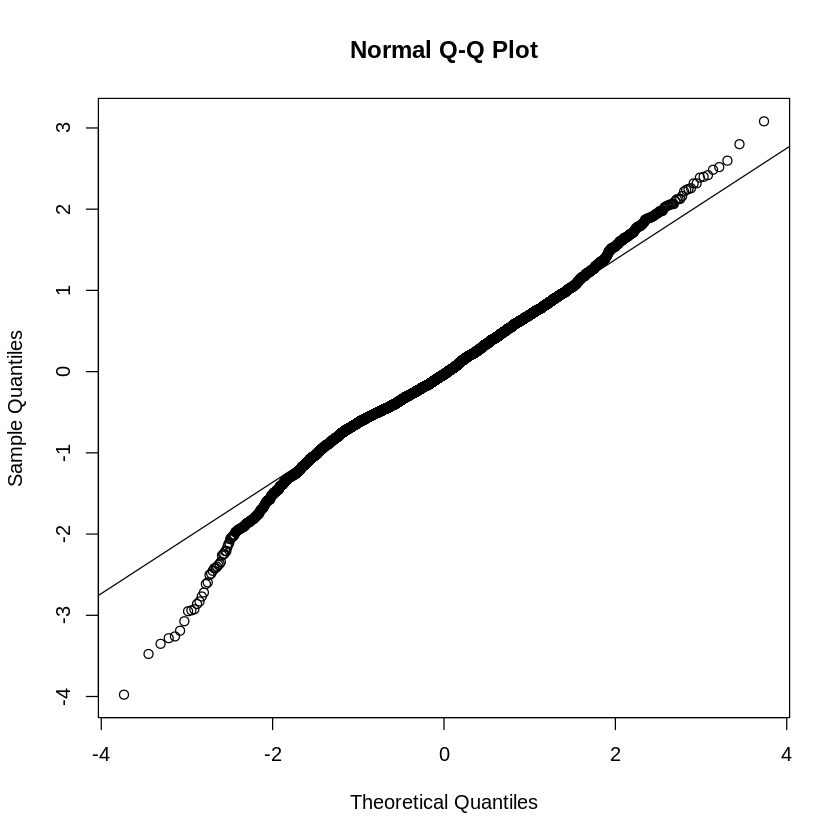

In [114]:
# Plotting Normality of Residuals graph: Q-Q Plot
qqnorm(residuals)
qqline(residuals)

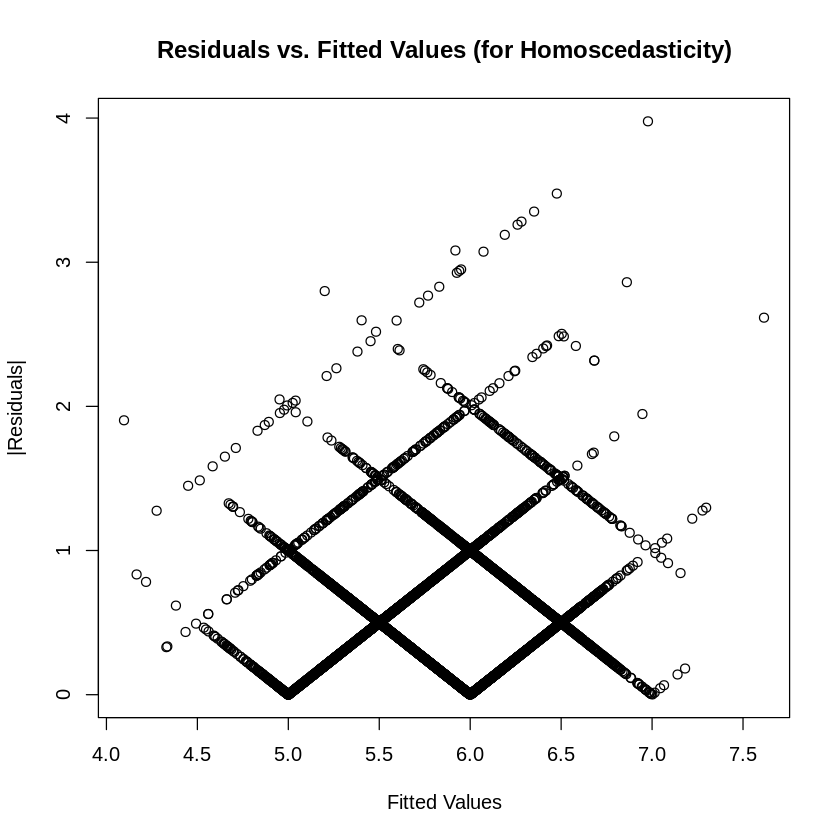

In [115]:
# Homoscedasticity: Residuals vs. Fitted Values Plot (for constant variance)
plot(lm_model$fitted.values, abs(residuals),
     xlab = "Fitted Values", ylab = "|Residuals|",
     main = "Residuals vs. Fitted Values (for Homoscedasticity)")

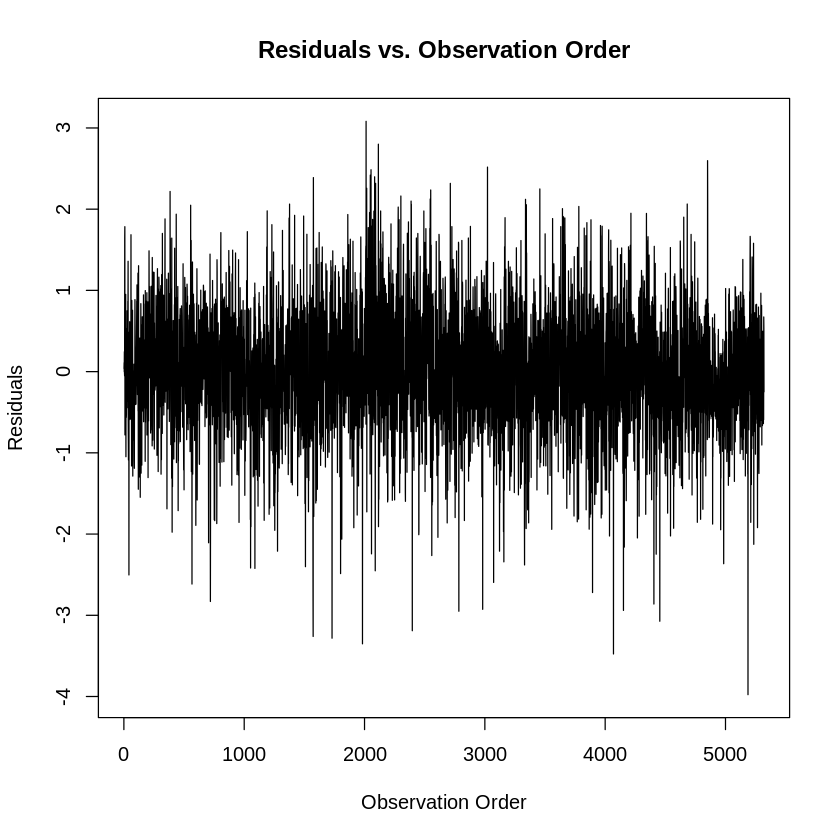

In [116]:
# Independence of Residuals: Residuals vs. Observation Order Plot
plot(residuals, type = "l",
     xlab = "Observation Order", ylab = "Residuals",
     main = "Residuals vs. Observation Order")

#REPORT

## Introduction/Background

Chemical composition is not the only aspect of food analysis. It covers insights into food production, quality assurance, and preventing contamination. Understanding customer preferences is necessary for businesses to analyze wine quality and be profitable and competitive. Customizing manufacturing processes and marketing tactics to properly match customer demand is made possible with the use of data analysis. Success in the food and beverage sector depends on maintaining consistency in product quality and adhering to food and trade rules. Determining wine quality and its consequences for commercial success is therefore essential for experts looking to maximize profits and streamline processes. These people or organizations will find this analysis useful for their study.

Essential ideas of wine production and quality evaluation are provided to frame the investigation. Wine quality is mostly determined by factors including grape variety, vineyard location, climate, soil composition, and winemaking procedures. Tangible evaluations and chemical research are typically used to measure wine quality. Previous research provides valuable insights into methods and findings, aiding in the comprehension and placement of the current investigation.

Furthermore, there are several previous research on wine quality analysis that may help the audience understand the subject. Researchers have examined a wide range of aspects of wine quality evaluation, including the impact of grape variety, winemaking techniques, terroir—a blend of soil, climate, and topography—chemical composition, and winemaking techniques on the characteristics of wine and consumer preferences. Research has also examined the use of analytical instruments for measuring significant components of wine and assessing quality qualities, such as spectroscopy and chromatography, in conjunction with sensory assessment methods like wine tasting panels and descriptive analysis.

The dataset sourced from the UCI Machine Learning Repository comprises physicochemical properties and quality ratings of red and white wines, likely collected for research purposes by wine-related organizations. The dataset prompts questions are -

Q1. What are the key physicochemical properties that influence wine quality ratings?

Q2. Is there a difference in quality ratings between red and white wines?

Q3. Are there any interactions or nonlinear relationships between the predictor variables and wine quality?

## Methods/Results (experimental design and data collection)

Based on the findings of the exploratory data analysis, significant steps were taken to completely understand the dataset and its variables (EDA). The data was checked for duplicates and missing values to ensure integrity. Summary statistics provided an overview, while box plots and histograms allowed for the visual investigation of variable distributions and outliers. The outliers were retained in order to maintain the analysis's integrity. Further study focused on factors such residual sugar, alcohol content, and quality across different wine varieties to enhance knowledge of distributions and potential relationships between quality.

Analyses are most appropriate to answer the question of interest:

1. Physicochemical Properties Affecting Wine Quality Evaluations: Regression modeling was employed.

2. Difference in Quality Ratings Between Red and White Wines: Hypothesis Testing and ANOVA were used.

3. Interactions or Nonlinear Relationships Between Predictor Variables and Wine Quality: Regression Modeling, including diagnostics of the model.

Assumptions associated with each analysis are:

1. Hypothesis Testing (t-test and randomization): Assumptions included normality, independence, and equal variances between groups.

2. Confidence Intervals: Assumptions relied on the Central Limit Theorem for large sample sizes.

3. Bootstrapping: Assumptions included sample representativeness and adequacy of resampling.

4. Regression Modeling: Assumptions included linearity, independence, homoscedasticity, and normality of residuals.

5. Diagnostics of the Model: Assumptions regarding residual normality and homoscedasticity were evaluated.

6. ANOVA: Assumptions included normality, homogeneity of variances between groups, and independence.

7. Model Selection: Assumed nested or directly comparable models.

8. Generalized Linear Modeling: Assumptions included linear regression assumptions and appropriate link function and distribution choice.

Graphics and results interpretation:

- Hypothesis Testing: Significant difference in mean quality ratings between red and white wines (p < 0.05). Therefore, we reject the null hypothesis, with "White" wines having a higher mean quality score than "Red" wines.
  
- Confidence Intervals: Estimates of population means for red and white wines do not overlap, supporting a difference in mean quality ratings.

- Bootstrapping Results: Confidence interval estimate supports precision of mean quality rating.

- Regression Modeling: Identified significant predictors of wine quality.

- ANOVA: Confirmed significant difference in mean quality ratings between wine types.

- Model Selection: Original multiple linear regression model preferred over alternatives. The best fitting model determined with the test is lm_model with lowest AIC value.

- Generalized Linear Modeling: Similar results to linear regression. We reject the null hypothesis because there is a significant difference in the mean quality scores between "Red" and "White" wines, with "White" wines having a higher mean quality score than "Red" wines.

Interpreting results aligned with research questions:

1. What are the key physicochemical properties that influence wine quality ratings?

- Regression modeling was utilized to distinguish the key physicochemical properties that impact wine quality ratings. Numerous important factors, including alcohol level, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and wine type (red or white), were found to be significant predictors of wine quality. These results imply that the overall impression of wine quality is influenced by a mixture of these physicochemical characteristics. Particularly, it seems that variables like sulfur dioxide concentrations, alcohol content, and acidity levels are important in establishing wine quality ratings.


2. Is there a difference in quality ratings between red and white wines?

- To determine if red and white wine quality ratings differ, hypothesis testing and ANOVA were employed. White wines had somewhat better mean quality ratings than red wines, according to both analyses, which supported a significant difference. According to this research, consumers can believe that white wines are somewhat better than red wines because of variations in flavor profiles, manufacturing processes, or cultural preferences. It's important to remember that, even while the difference in mean quality ratings between red and white wines is statistically significant, it might not be practically meaningful.

3. Are there any interactions or nonlinear relationships between the predictor variables and wine quality?

- Regression analysis was performed along with model diagnostics to look into interactions or nonlinear correlations between predictor variables and wine quality. Even though the study identified significant attributes, such alcohol content and acidity levels, as indicators of wine quality, further investigation is required to fully understand the complex relationships that exist between these elements and wine quality. Additional statistical techniques, such as machine learning algorithms, may be employed to uncover latent patterns or interactions that the linear regression model failed to identify.

## CONCLUSIONS

- Wine quality ratings are heavily influenced by physicochemical characteristics such as alcohol content, red versus white wine type, residual sugar, sulfur dioxide levels, pH, sulphates, and volatile acidity.

- Red wines typically receive mean quality ratings that are marginally lower than those of white wines, which could indicate variations in consumer preferences or manufacturing methods.

- To completely comprehend the dynamics of the complex correlations that exist between predictor variables and wine quality, more research is necessary.

- Practical ramifications include enhancing overall quality through component selection and manufacturing process optimization, as well as educating consumers about aspects that affect wine quality and helping them make informed decisions.

- Further investigation is necessary, with future studies concentrating on particular interactions or nonlinear correlations between predictor variables and wine quality. The dataset should also be expanded to encompass a wider variety of wines from various regions and vintages for comprehensive insights.

The research highlights the significance of physical and chemical properties in determining wine quality. It demonstrates the significance of factors such volatile acidity, residual sugar, and alcohol content in quality assessments by validating their effects. Moreover, the observed differences in mean quality ratings between red and white wines highlight the importance of considering wine type when evaluating quality and suggest potential shifts in consumer preferences or production techniques. The complicated relationships between predictor factors and wine quality emphasize the need for more study to fully comprehend these sophisticated processes. Practically speaking, the findings offer valuable information to wine producers on how to improve overall quality and satisfaction by streamlining processes and influencing consumer choices. However, further research is needed to concentrate on specific interactions and nonlinear correlations between variables and to enlarge the dataset to include a wider variety of wines in order to gain a deeper understanding of the factors that determine wine quality.


### Future Research Ideas -

Future avenues for research based on the analysis findings include:

1. Exploration of Interactions and Nonlinear Relationships:
  - Using sophisticated statistical methods to find complex relationships between predictor variables that impact wine quality, such as machine learning and interaction terms.

2. Incorporation of Additional Factors:
   - For a more thorough understanding, expanding the dataset to include variables other than physicochemical parameters, such as grape type, fermentation methods, and geographic origin.

3. Temporal Analysis and Longitudinal Studies:
   - To get insights into the evolution of wine characteristics and the aging process, conduct longitudinal studies to monitor changes in wine quality over time.

4. Cross-Cultural Studies and Consumer Preferences:
   - Examining cross-cultural differences in wine tastes to learn about the psychological, social, and cultural influences on consumer behavior.

5. Integration of Sensory Analysis:
   - Combining objective physicochemical data with subjective sensory evaluations to gain deeper insights into perceptual aspects of wine quality.

6. Application of Advanced Modeling Techniques:
   - Using the cutting-edge modeling strategies to improve prediction accuracy and find hidden patterns in the data, such as machine learning algorithms.

7. Impact of Environmental and Sustainable Practices:
   - Evaluating how environmentally friendly and sustainable procedures affect wine quality in order to support the wine industry's sustainability initiatives.

